## Loading Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
import os

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor 

import statsmodels.formula.api as smf
from sklearn import metrics
import scipy.stats as stats

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

## Loading Data

In [2]:
Data = pd.read_csv("Train.txt",delimiter=",",header=None)

In [3]:
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)
pd.set_option("display.width",1000)
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [4]:
col_name = ["Duration","Protocol_type","Service","Flag","Src_bytes", "Dst_bytes","Land", "Wrong_fragment","Urgent","Hot","Num_failed_logins","Logged_in","Num_compromised","Root_shell","Su_attempted","Num_root","Num_file_creations","Num_shells","Num_access_files","Num_outbound_cmds","Is_host_login","Is_guest_login","Count","Srv_count","Serror_rate","Srv_serror_rate",
"Rerror_rate","Srv_rerror_rate","Same_srv_rate","Diff_srv_rate","Srv_diff_host_rate","Dst_host_count","Dst_host_srv_count","Dst_host_same_srv_rate","Dst_host_diff_srv_rate","Dst_host_same_src_port_rate",
"Dst_host_srv_diff_host_rate","Dst_host_serror_rate","Dst_host_srv_serror_rate", "Dst_host_rerror_rate","Dst_host_srv_rerror_rate","Attack", "Last_flag"]

In [5]:
for i in range (0,43):
    Data = Data.rename(columns={i:col_name[i]})

## Creating Target Variable Activity

In [6]:
Data['Activity'] = np.where(Data.Attack=="normal",0,1)

In [7]:
print(Data.Activity.value_counts()) # 0 is normal and 1 is attack which is our event

0    67343
1    58630
Name: Activity, dtype: int64


## Reducing the number of sub-category in Categorical variable Service

In [8]:
Data.Service = pd.Series(np.where((Data.Service=="http"),"http",(np.where((Data.Service=="private"),"private",(
                np.where((Data.Service=="domain_u"),"domain_u",(np.where((Data.Service=="smtp"),"smtp",(
                                                                      np.where((Data.Service=="ftp_data"),"ftp_data","other_type"))))))))))

In [9]:
Data.Service.value_counts()

other_type    40566
http          40338
private       21853
domain_u       9043
smtp           7313
ftp_data       6860
Name: Service, dtype: int64

In [10]:
print(Data.shape)

(125973, 44)


In [11]:
y_multi = Data.Attack

In [12]:
Data = Data.drop(columns="Attack",axis=1)

In [13]:
Data.head(1)

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,Root_shell,Su_attempted,Num_root,Num_file_creations,Num_shells,Num_access_files,Num_outbound_cmds,Is_host_login,Is_guest_login,Count,Srv_count,Serror_rate,Srv_serror_rate,Rerror_rate,Srv_rerror_rate,Same_srv_rate,Diff_srv_rate,Srv_diff_host_rate,Dst_host_count,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,Last_flag,Activity
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,20,0


In [15]:
#Profile = pandas_profiling.ProfileReport(Data)
#Profile.to_file("Output.html")

## On the basis of Pandas Profiling dropping variable which are highly corelated  and which are constant

In [14]:
Data = Data.drop(columns={"Num_root","Srv_serror_rate","Srv_rerror_rate","Dst_host_serror_rate","Dst_host_srv_serror_rate","Dst_host_rerror_rate","Dst_host_srv_rerror_rate"})
Data = Data.drop(columns={"Wrong_fragment"})

In [15]:
Data=Data.drop(columns={"Num_access_files","Num_failed_logins","Num_file_creations","Num_outbound_cmds","Num_shells"},axis=1)

In [16]:
Data_num = Data.loc[:,Data.columns.difference(["Protocol_type","Service","Flag","Urgent","Land","Logged_in","Root_shell","Su_attempted","Is_host_login","Is_guest_login"])]

In [17]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])
Data_num.apply(lambda x: var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Activity,125973.0,0.0,5.863000e+04,0.465417,0.00,4.988046e-01,2.488060e-01,1.071736,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.000000e+00
Count,125973.0,0.0,1.059528e+07,84.107555,14.00,1.145086e+02,1.311222e+04,1.361454,0.0,1.0,1.00,1.00,2.00,14.00,143.00,256.00,286.00,511.00,5.110000e+02
Diff_srv_rate,125973.0,0.0,7.942930e+03,0.063053,0.00,1.803144e-01,3.251329e-02,2.859744,0.0,0.0,0.00,0.00,0.00,0.00,0.06,0.07,0.29,1.00,1.000000e+00
Dst_bytes,125973.0,0.0,2.491634e+09,19779.114421,0.00,4.021269e+06,1.617061e+13,203.308857,0.0,0.0,0.00,0.00,0.00,0.00,516.00,3375.80,8314.00,25519.00,1.309937e+09
Dst_host_count,125973.0,0.0,2.294585e+07,182.148945,255.00,9.920621e+01,9.841873e+03,0.544643,0.0,1.0,3.00,11.00,82.00,255.00,255.00,255.00,255.00,255.00,2.550000e+02
Dst_host_diff_srv_rate,125973.0,0.0,1.044960e+04,0.082951,0.02,1.889218e-01,3.569145e-02,2.277508,0.0,0.0,0.00,0.00,0.00,0.02,0.07,0.10,0.56,1.00,1.000000e+00
Dst_host_same_src_port_rate,125973.0,0.0,1.869173e+04,0.148379,0.00,3.089971e-01,9.547923e-02,2.082488,0.0,0.0,0.00,0.00,0.00,0.00,0.06,0.84,1.00,1.00,1.000000e+00
Dst_host_same_srv_rate,125973.0,0.0,6.566238e+04,0.521242,0.51,4.489494e-01,2.015555e-01,0.861307,0.0,0.0,0.00,0.01,0.05,0.51,1.00,1.00,1.00,1.00,1.000000e+00
Dst_host_srv_count,125973.0,0.0,1.456916e+07,115.653005,63.00,1.107027e+02,1.225510e+04,0.957197,0.0,1.0,1.00,2.00,10.00,63.00,255.00,255.00,255.00,255.00,2.550000e+02
Dst_host_srv_diff_host_rate,125973.0,0.0,4.099470e+03,0.032542,0.00,1.125638e-01,1.267061e-02,3.458984,0.0,0.0,0.00,0.00,0.00,0.00,0.02,0.05,0.18,0.52,1.000000e+00


In [19]:
def missing(x):
    x = x.fillna(x.mean())
    return x

In [20]:
Data_num= Data_num.apply(missing)

In [21]:
def outliers(x):
    lc = x.quantile(0.01)
    uc = x.quantile(0.99)
    return x.clip(lower = lc, upper = uc)

In [22]:
Data_num = Data_num.apply(outliers)

#### Univariate Analysis Numerical

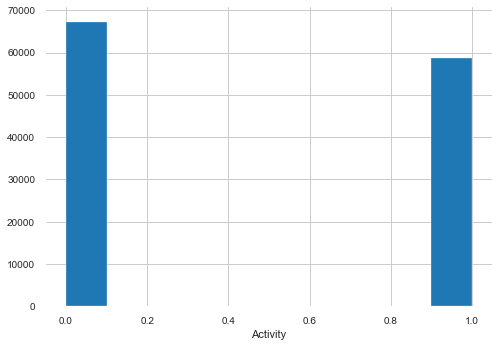

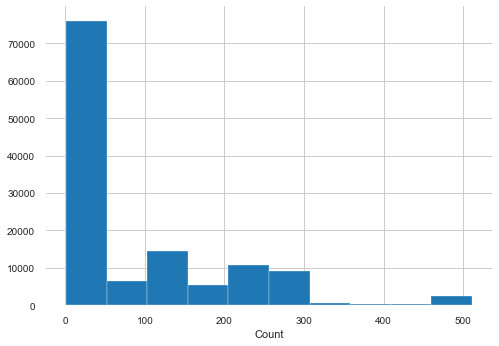

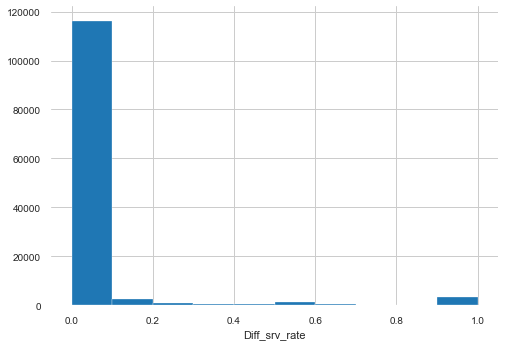

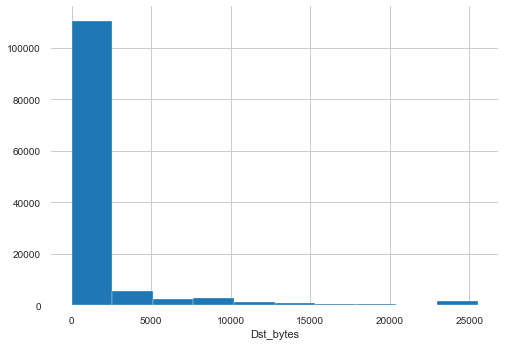

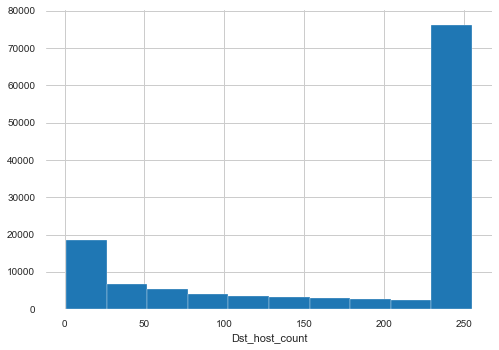

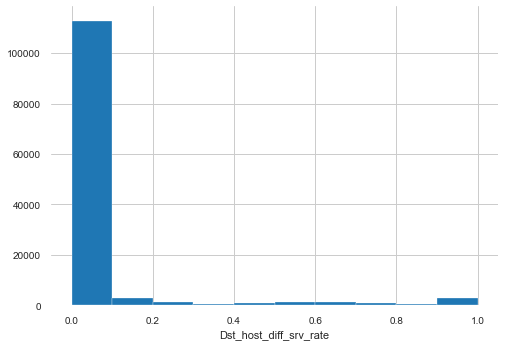

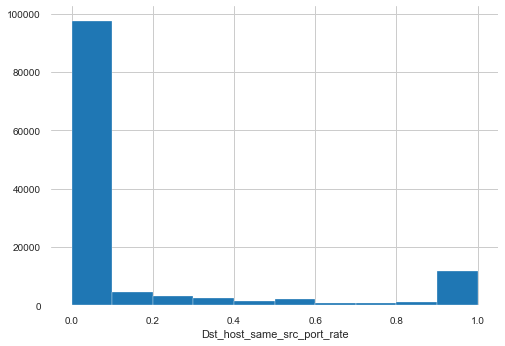

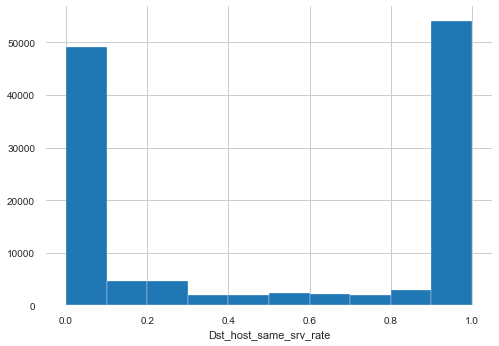

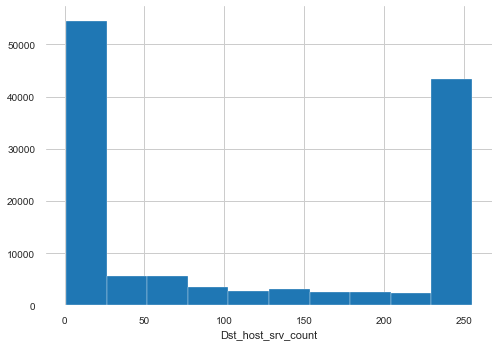

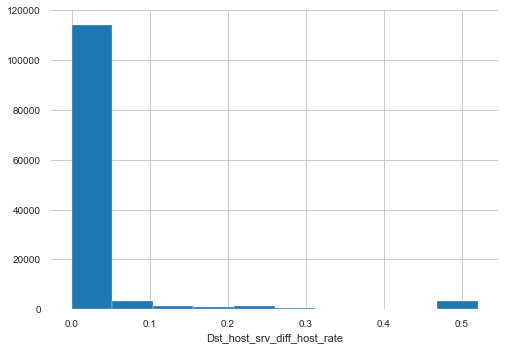

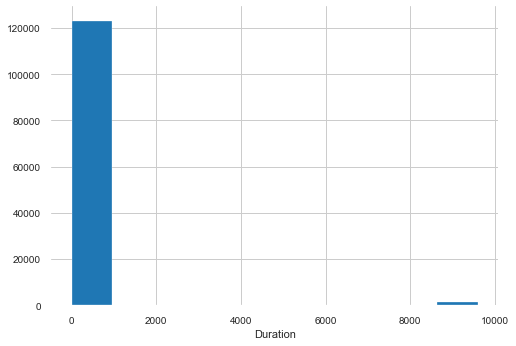

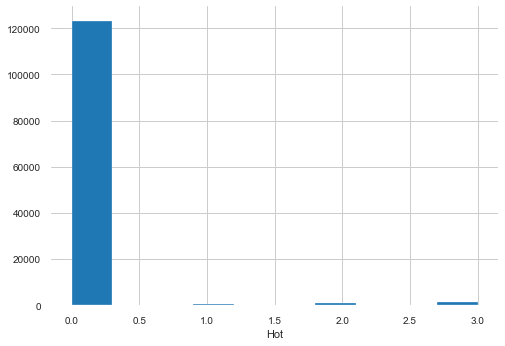

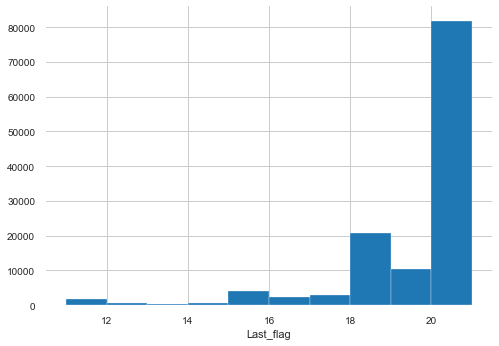

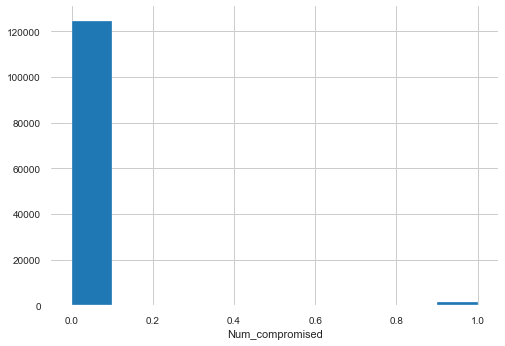

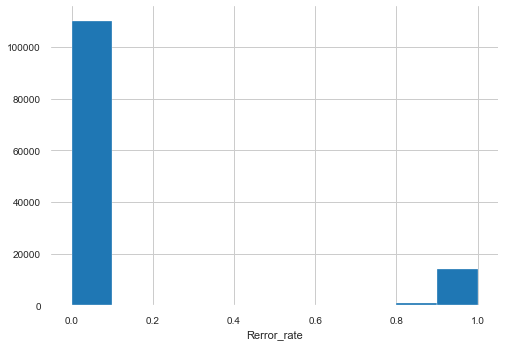

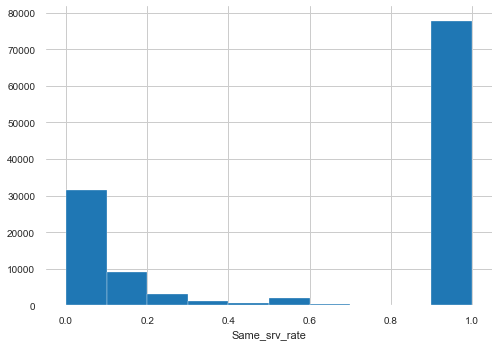

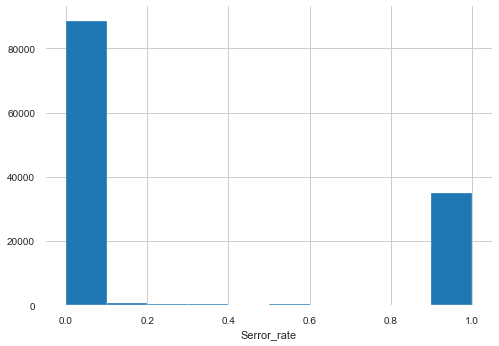

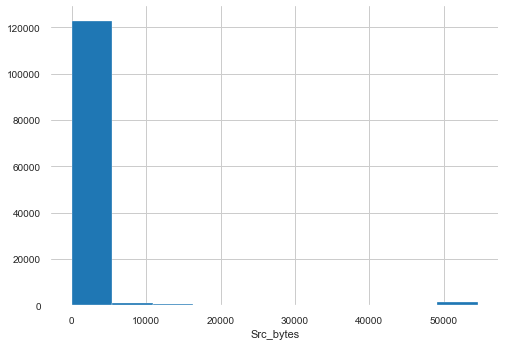

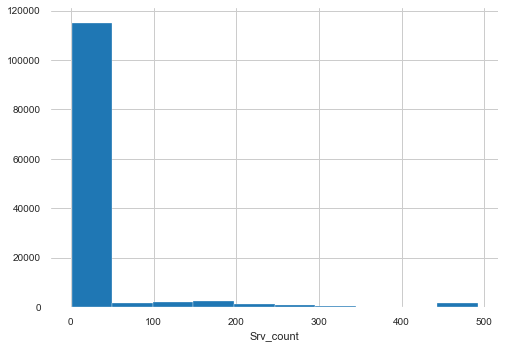

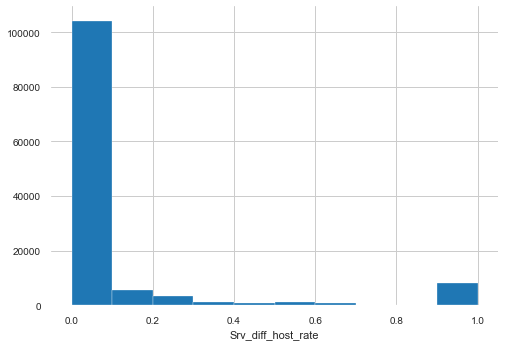

In [25]:
for i in Data_num.columns:
    Data_num[i].hist()
    plt.xlabel(str(i))
    plt.show()

1. There are `44%` of attack in the data
2. Mostly connections does have the same destination host as the current connection
3. In 80% of connection the `data bytes transfer` is 0 from `source to single data connection`
4. 70% of connections have the `same destination host IP address "250"`
5. 95% of the connection have `0` connection time
6. 0% of Number of `compromised' 'conditions'`, Number of operations on access control files and Failed login
7. `81%,68%`of connections have Rerror rate and Serror rate have been 0 respectively

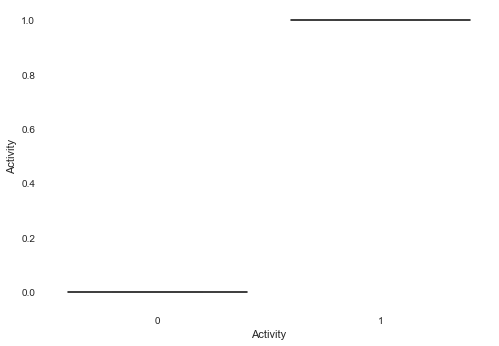

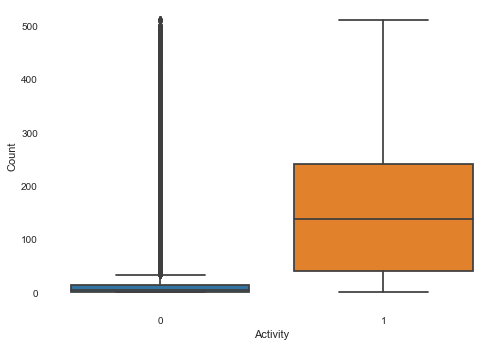

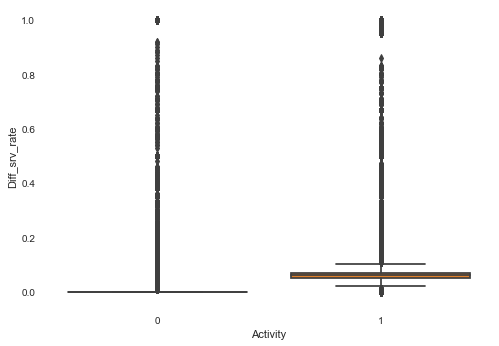

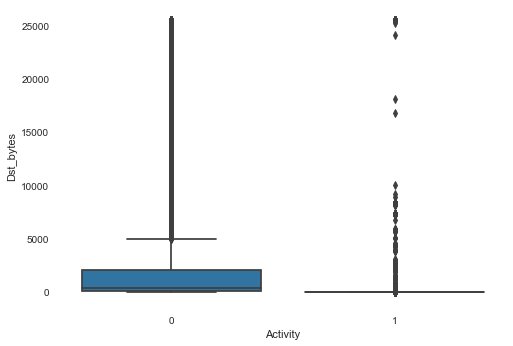

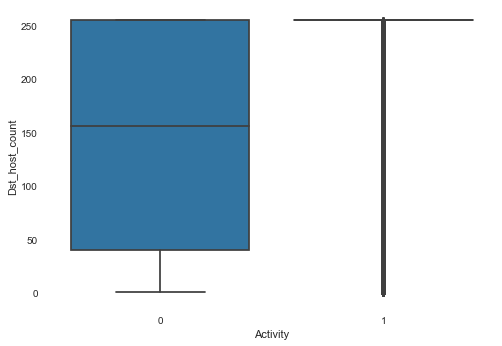

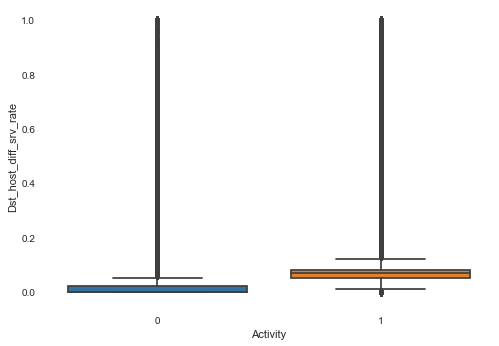

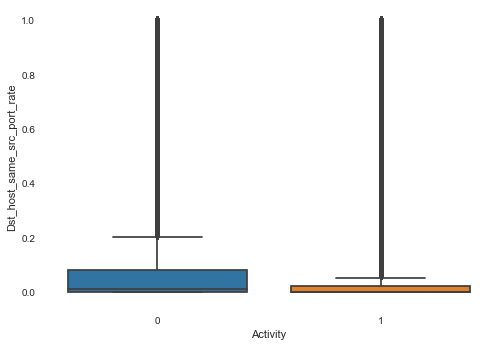

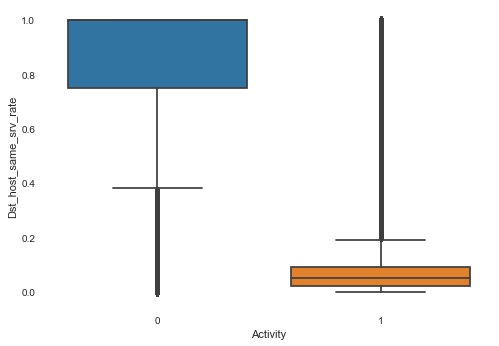

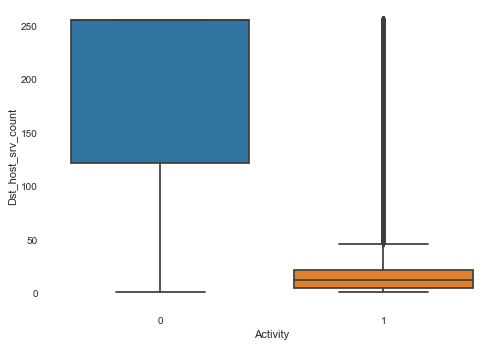

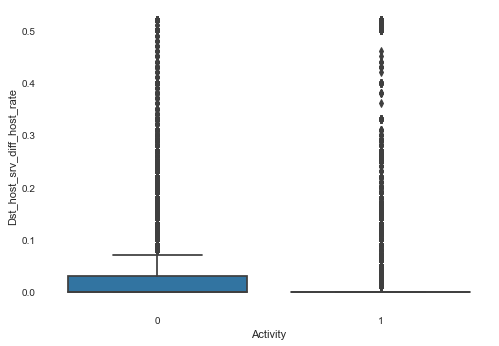

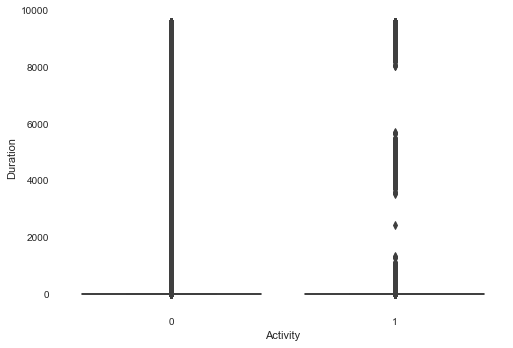

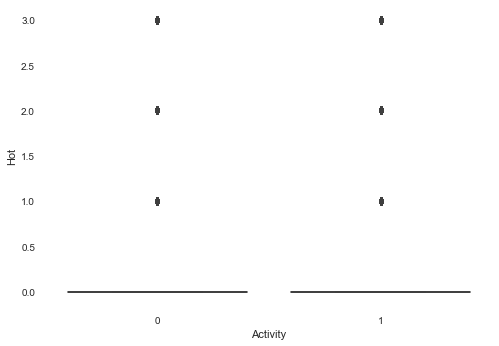

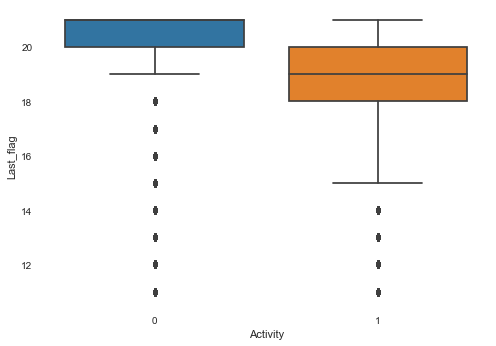

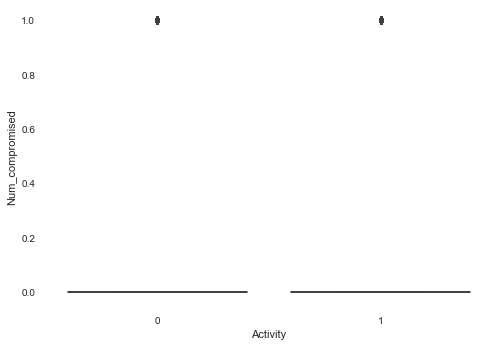

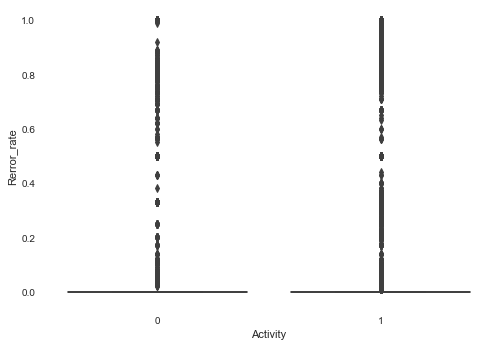

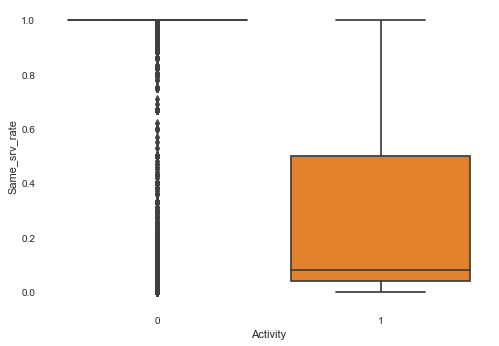

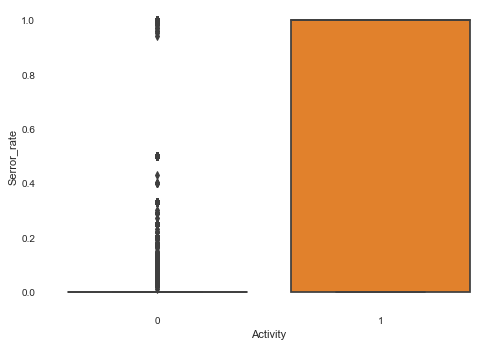

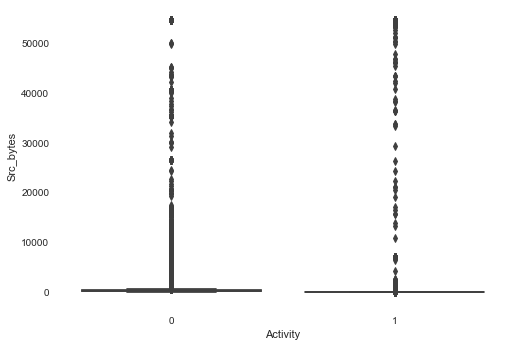

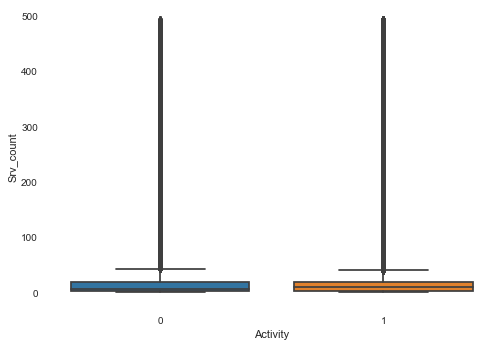

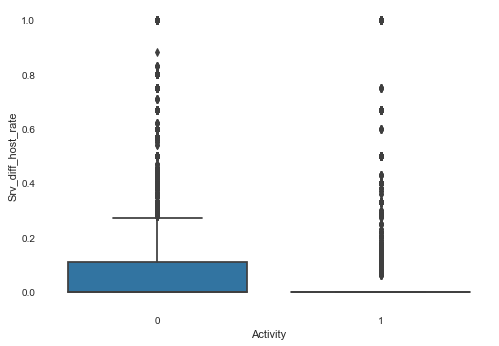

In [26]:
for i in Data_num.columns:
    sns.boxplot(data = Data_num,x="Activity",y=Data_num[i])
    plt.show()

1. The connections who have an `attack` in their network have more `number of connection to the same destination host at the current connection in past 2 seconds`
2. `Normal` connections have `more number of data bytes transfered from destination to source in single connection`
3. Connections who have been `attacked` have more `number of connections having the same destination host IP address` 
4.`Normal` connections have more `activated "Last Flag"` more than attacked networks

In [23]:
Data_cat = Data.loc[:,["Protocol_type","Service","Flag","Urgent","Land","Logged_in","Root_shell","Su_attempted","Is_host_login","Is_guest_login","Activity"]]

In [24]:
def missing_cat(x):
    x=x.fillna(x.mode)
    return x

In [25]:
Data_cat = Data_cat.apply(missing_cat)

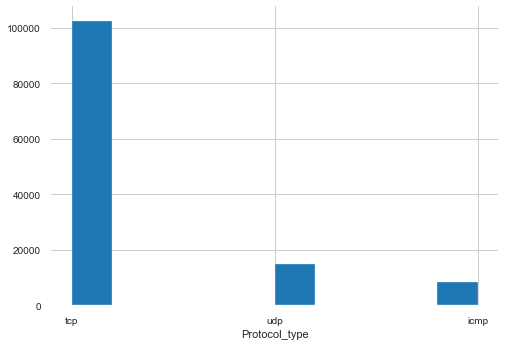

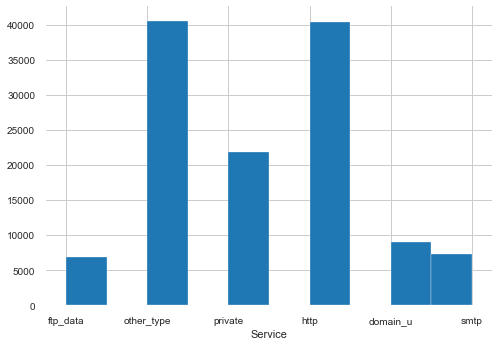

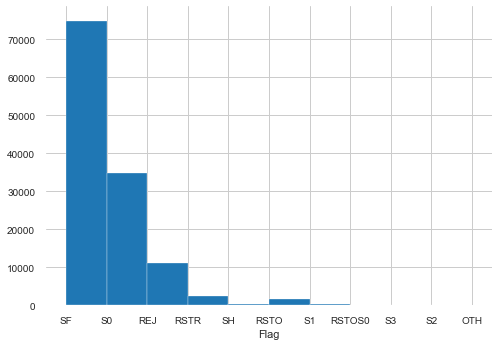

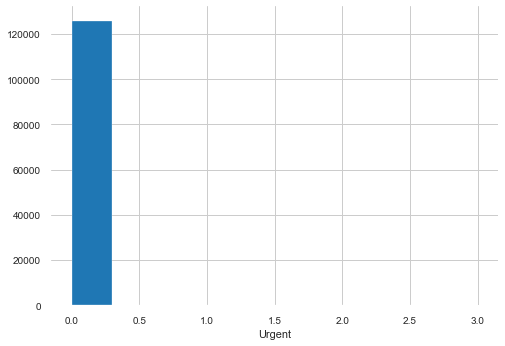

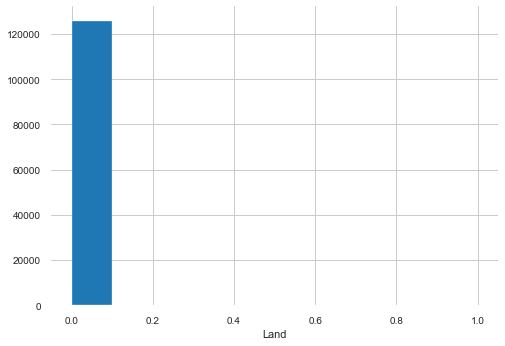

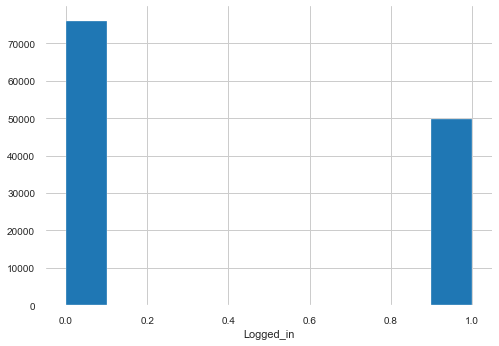

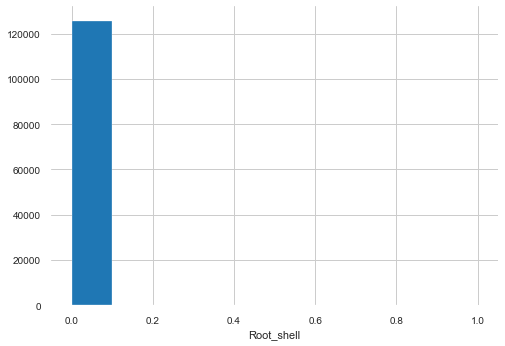

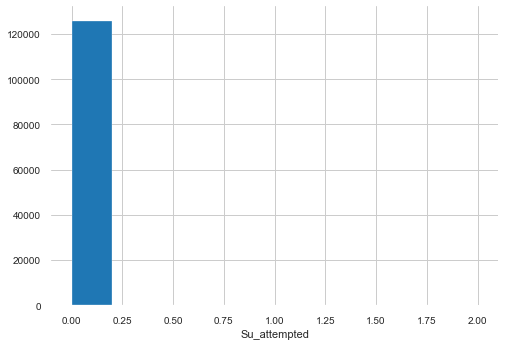

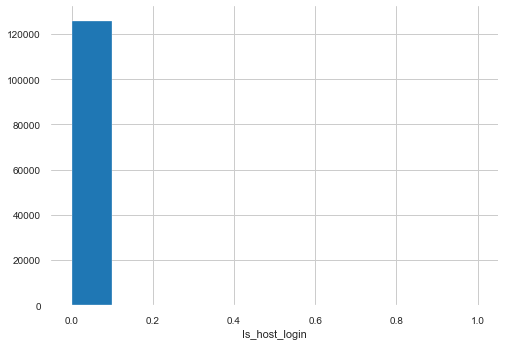

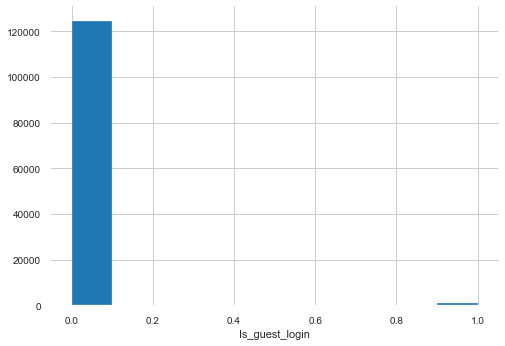

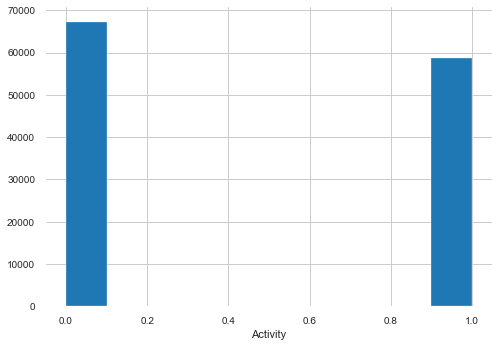

In [33]:
for i in Data_cat.columns:
    Data_cat[i].hist()
    plt.xlabel(str(i))
    plt.show()

1. Most of the network protocol are of TCP tpye
2. HTTP have been used more as service type
3. SF falg have been activated more
4. 44% of the connection have not successful login 
5. In none of the connections the root shell have been obtained
6. None of the connection belongs to the `Hot` list and are not guest login

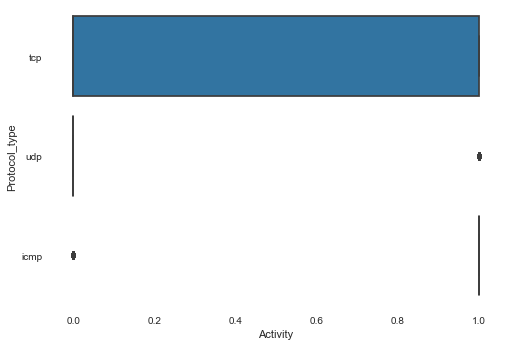

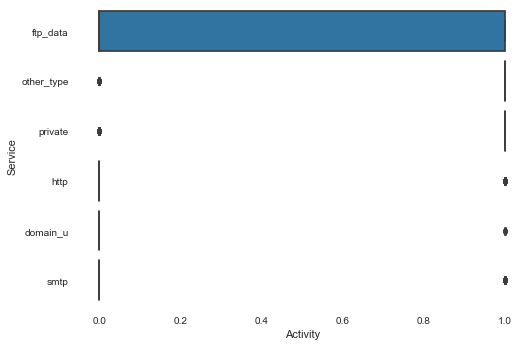

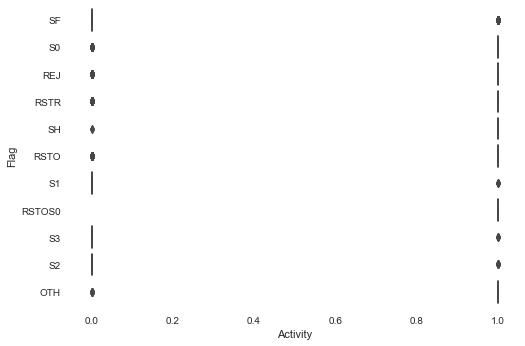

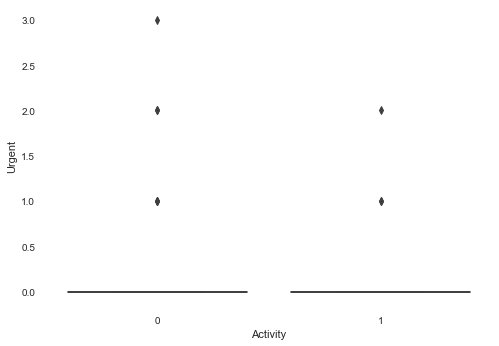

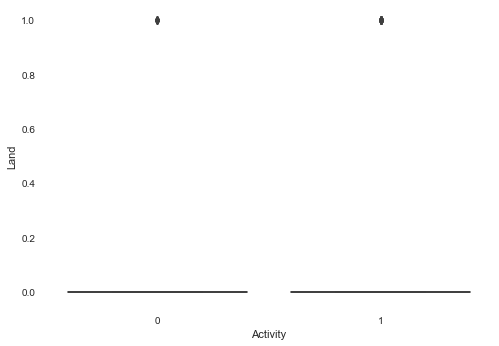

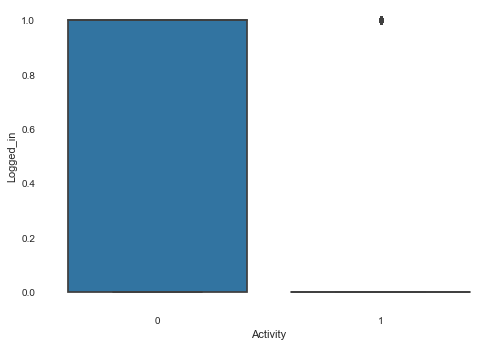

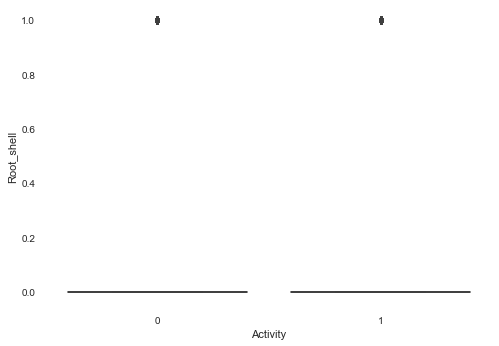

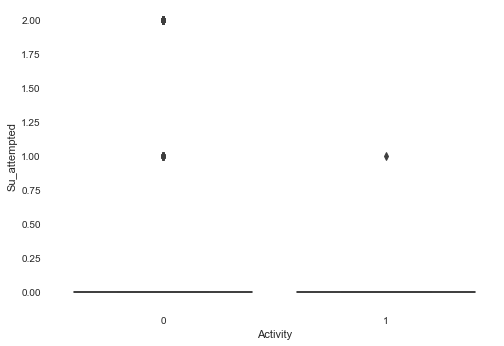

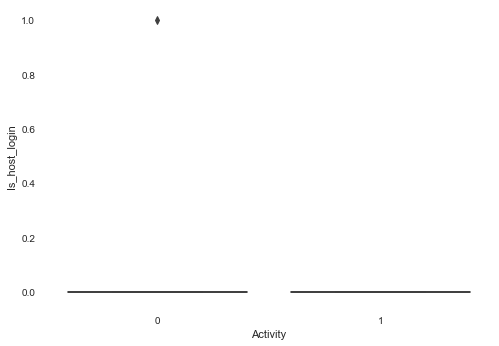

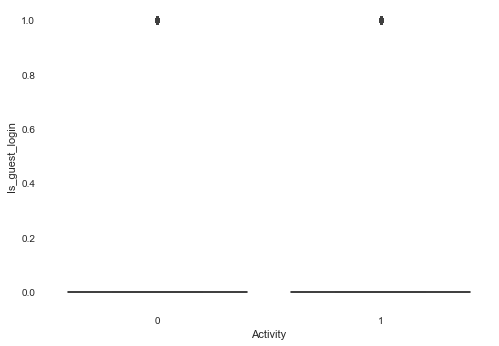

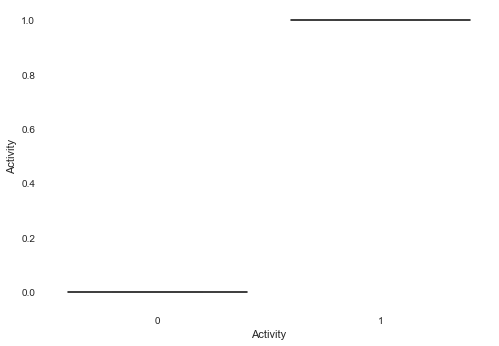

In [34]:
for i in Data_cat.columns:
    sns.boxplot(data = Data_cat,x="Activity",y=Data_cat[i])
    plt.show()

1. Normal connection have http type service more than attacked connection
2. Attacked connection have other type, private of service more as comapre to normal connection
3. Flag_S0 have been activated more in attacked connections
4. Flag_SF have been activated more in normal connections
5. Normal connections have more successfull logins

In [27]:
def create_dummies(df, colname):
    col_dummy = pd.get_dummies(df[colname],prefix=colname,drop_first=True)
    df = pd.concat([df,col_dummy],axis=1)
    df.drop(colname,axis=1,inplace=True)
    return df

In [28]:
for c_feature in Data_cat.columns[0:len(Data_cat.columns)-1]:
    Data_cat[c_feature] = Data_cat[c_feature].astype('category')
    Data_cat = create_dummies(Data_cat,c_feature)

In [29]:
Data_cat.head(2)

,Activity,Protocol_type_tcp,Protocol_type_udp,Service_ftp_data,Service_http,Service_other_type,Service_private,Service_smtp,Flag_REJ,Flag_RSTO,Flag_RSTOS0,Flag_RSTR,Flag_S0,Flag_S1,Flag_S2,Flag_S3,Flag_SF,Flag_SH,Urgent_1,Urgent_2,Urgent_3,Land_1,Logged_in_1,Root_shell_1,Su_attempted_1,Su_attempted_2,Is_host_login_1,Is_guest_login_1
0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [30]:
Pre_processing_data = pd.concat([Data_num,Data_cat],axis=1)

In [31]:
Normal_Data = Pre_processing_data

In [32]:
Normal_Data = Normal_Data.drop(columns="Activity",axis =1 )

In [33]:
Normal_Data['Activity'] = Data.Activity

# RFE

In [34]:
feature = Normal_Data.loc[:,Normal_Data.columns.difference(['Activity'])]
target = Normal_Data.Activity

In [43]:
rfe= RFE(RandomForestClassifier(),20)
rfe = rfe.fit(feature, target)

In [44]:
RFE_feature = feature.columns[rfe.get_support()]
Rfe_result = feature[RFE_feature]

In [45]:
Rfe_result.columns

Index(['Count', 'Diff_srv_rate', 'Dst_bytes', 'Dst_host_count', 'Dst_host_diff_srv_rate', 'Dst_host_same_src_port_rate', 'Dst_host_same_srv_rate', 'Dst_host_srv_count', 'Dst_host_srv_diff_host_rate', 'Flag_SF', 'Last_flag', 'Logged_in_1', 'Protocol_type_tcp', 'Same_srv_rate', 'Serror_rate', 'Service_http', 'Service_other_type', 'Service_private', 'Src_bytes', 'Srv_count'], dtype='object')

In [35]:
Select_K_best = SelectKBest(f_classif,k=20).fit(feature,target)

In [36]:
feature.columns[Select_K_best.get_support()]

Index(['Count', 'Diff_srv_rate', 'Dst_bytes', 'Dst_host_count', 'Dst_host_diff_srv_rate', 'Dst_host_same_srv_rate', 'Dst_host_srv_count', 'Flag_REJ', 'Flag_S0', 'Flag_SF', 'Last_flag', 'Logged_in_1', 'Protocol_type_udp', 'Rerror_rate', 'Same_srv_rate', 'Serror_rate', 'Service_http', 'Service_other_type', 'Service_private', 'Service_smtp'], dtype='object')

In [38]:
Normal_Num = Normal_Data.iloc[:,range(0,19)]
Normal_Num['Activity'] = Normal_Data.Activity

In [39]:
Normal_Num.head(3)

,Count,Diff_srv_rate,Dst_bytes,Dst_host_count,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_same_srv_rate,Dst_host_srv_count,Dst_host_srv_diff_host_rate,Duration,Hot,Last_flag,Num_compromised,Rerror_rate,Same_srv_rate,Serror_rate,Src_bytes,Srv_count,Srv_diff_host_rate,Activity
0,2,0.00,0,150,0.03,0.17,0.17,25,0.0,0.0,0,20,0,0.0,1.00,0.0,491,2,0.0,0
1,13,0.15,0,255,0.60,0.88,0.00,1,0.0,0.0,0,15,0,0.0,0.08,0.0,146,1,0.0,0
2,123,0.07,0,255,0.05,0.00,0.10,26,0.0,0.0,0,19,0,0.0,0.05,1.0,0,6,0.0,1


In [40]:
Normal_Num.shape

(125973, 20)

In [41]:
Normal_cat = Normal_Data.iloc[:,range(19,47)]

In [42]:
Normal_cat.shape

(125973, 28)

In [52]:
#numerical_profile= pandas_profiling.ProfileReport(Normal_Num)
#numerical_profile.to_file("Numerical.html")

# Univariate variable reduction

In [43]:
Logit_feature = Normal_Num.columns.difference(['Activity'])

In [44]:
Logit_feature

Index(['Count', 'Diff_srv_rate', 'Dst_bytes', 'Dst_host_count', 'Dst_host_diff_srv_rate', 'Dst_host_same_src_port_rate', 'Dst_host_same_srv_rate', 'Dst_host_srv_count', 'Dst_host_srv_diff_host_rate', 'Duration', 'Hot', 'Last_flag', 'Num_compromised', 'Rerror_rate', 'Same_srv_rate', 'Serror_rate', 'Src_bytes', 'Srv_count', 'Srv_diff_host_rate'], dtype='object')

In [45]:
model = None
pred = None
Auroc = []
Gini = []
for col in Logit_feature:
    print(col)
    model = smf.logit(formula="Activity~"+col,data=Normal_Num).fit()
    pred = model.predict(Normal_Num)
    au_roc = metrics.roc_auc_score(Normal_Num['Activity'],pred)
    Auroc.append(au_roc)
    Gini.append(2*au_roc-1)
Auroc = pd.Series(Auroc,name = "auroc")
Gini = pd.Series(Gini,name = "gini")
Logit_feature = pd.Series(Logit_feature,name= "Columns")

Count
Optimization terminated successfully.
         Current function value: 0.474707
         Iterations 7
Diff_srv_rate
Optimization terminated successfully.
         Current function value: 0.666611
         Iterations 6
Dst_bytes
Optimization terminated successfully.
         Current function value: 0.594466
         Iterations 8
Dst_host_count
Optimization terminated successfully.
         Current function value: 0.615406
         Iterations 5
Dst_host_diff_srv_rate
Optimization terminated successfully.
         Current function value: 0.656414
         Iterations 6
Dst_host_same_src_port_rate
Optimization terminated successfully.
         Current function value: 0.686483
         Iterations 4
Dst_host_same_srv_rate
Optimization terminated successfully.
         Current function value: 0.421391
         Iterations 6
Dst_host_srv_count
Optimization terminated successfully.
         Current function value: 0.380618
         Iterations 7
Dst_host_srv_diff_host_rate
Optimization termi

In [46]:
Logit_Regression_Features = pd.concat([Logit_feature,Auroc,Gini],axis =1)
Logit_Regression_Features = Logit_Regression_Features.sort_values(by ="gini",ascending=False)
Logit_Regression_Features.reset_index(drop=True)

,Columns,auroc,gini
0,Dst_bytes,0.899522,0.799045
1,Src_bytes,0.898663,0.797325
2,Dst_host_srv_count,0.892480,0.784961
3,Same_srv_rate,0.873908,0.747816
4,Dst_host_same_srv_rate,0.865348,0.730696
5,Diff_srv_rate,0.844736,0.689472
6,Dst_host_diff_srv_rate,0.826678,0.653356
7,Count,0.820804,0.641608
8,Serror_rate,0.806205,0.612409
9,Last_flag,0.762893,0.525786


In [47]:
#Selecting the top 10 varibales from above Dataframe
Num_variabels = Logit_Regression_Features.Columns[Logit_Regression_Features.auroc> .70]
Num_variabels

2                  Dst_bytes
16                 Src_bytes
7         Dst_host_srv_count
14             Same_srv_rate
6     Dst_host_same_srv_rate
1              Diff_srv_rate
4     Dst_host_diff_srv_rate
0                      Count
15               Serror_rate
11                 Last_flag
3             Dst_host_count
Name: Columns, dtype: object

# Chi-Square Test

In [48]:
chi2 = []
p_value = []
Cat_feature = Normal_cat.columns.difference(['Activity'])
for col in Cat_feature:
    crosstab = pd.crosstab(Normal_cat[col],Normal_cat.Activity,margins=True)
    Chi_Score = stats.chi2_contingency(observed=crosstab)
    chi2.append(Chi_Score[0])
    p_value.append(Chi_Score[1])
Cat_feature = pd.Series(Cat_feature,name = "Columns")
chi2 = pd.Series(chi2, name ="Chi_Score")
p_value = pd.Series(p_value, name = "P_Value")

In [49]:
Chi_result = pd.concat([Cat_feature,chi2,p_value],axis =1)
Chi_result = pd.DataFrame(Chi_result)

In [50]:
Cat_variables = Chi_result.Columns[Chi_result.P_Value <0.05]

In [51]:
Cat_variables

0               Flag_REJ
1              Flag_RSTO
2            Flag_RSTOS0
3              Flag_RSTR
4                Flag_S0
5                Flag_S1
6                Flag_S2
7                Flag_S3
8                Flag_SF
9                Flag_SH
10      Is_guest_login_1
13           Logged_in_1
14     Protocol_type_tcp
15     Protocol_type_udp
16          Root_shell_1
17      Service_ftp_data
18          Service_http
19    Service_other_type
20       Service_private
21          Service_smtp
22        Su_attempted_1
23        Su_attempted_2
Name: Columns, dtype: object

In [52]:
Selected_num_variabels = Normal_Num[Num_variabels]
Selected_cat_variables = Normal_cat[Cat_variables]

In [53]:
Final_data = pd.concat([Selected_num_variabels,Selected_cat_variables],axis =1)
Final_data['Activity']  = Normal_Data.Activity
Final_data.head(3)

,Dst_bytes,Src_bytes,Dst_host_srv_count,Same_srv_rate,Dst_host_same_srv_rate,Diff_srv_rate,Dst_host_diff_srv_rate,Count,Serror_rate,Last_flag,Dst_host_count,Flag_REJ,Flag_RSTO,Flag_RSTOS0,Flag_RSTR,Flag_S0,Flag_S1,Flag_S2,Flag_S3,Flag_SF,Flag_SH,Is_guest_login_1,Logged_in_1,Protocol_type_tcp,Protocol_type_udp,Root_shell_1,Service_ftp_data,Service_http,Service_other_type,Service_private,Service_smtp,Su_attempted_1,Su_attempted_2,Activity
0,0,491,25,1.00,0.17,0.00,0.03,2,0.0,20,150,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,0,146,1,0.08,0.00,0.15,0.60,13,0.0,15,255,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,26,0.05,0.10,0.07,0.05,123,1.0,19,255,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


### RFE on selected Data

In [54]:
feature_new = Final_data.loc[:,Final_data.columns.difference(['Activity'])]
target_new = Final_data.Activity

In [66]:
rfe1 = RFE(RandomForestClassifier(),20)
rfe1 = rfe1.fit(feature_new,target_new)

In [67]:
RFE_feature_new = feature_new.columns[rfe1.get_support()]
RFE_final_feature = feature_new[RFE_feature_new]
print(RFE_final_feature.columns)

Index(['Count', 'Diff_srv_rate', 'Dst_bytes', 'Dst_host_count', 'Dst_host_diff_srv_rate', 'Dst_host_same_srv_rate', 'Dst_host_srv_count', 'Flag_S0', 'Flag_SF', 'Last_flag', 'Logged_in_1', 'Protocol_type_tcp', 'Protocol_type_udp', 'Same_srv_rate', 'Serror_rate', 'Service_ftp_data', 'Service_http', 'Service_other_type', 'Service_private', 'Src_bytes'], dtype='object')


### Select K-Best on Selected Data

In [55]:
select_k_best = SelectKBest(f_classif,k=20).fit(feature_new,target_new)
feature_new.columns[select_k_best.get_support()]

Index(['Count', 'Diff_srv_rate', 'Dst_bytes', 'Dst_host_count', 'Dst_host_diff_srv_rate', 'Dst_host_same_srv_rate', 'Dst_host_srv_count', 'Flag_REJ', 'Flag_RSTR', 'Flag_S0', 'Flag_SF', 'Last_flag', 'Logged_in_1', 'Protocol_type_udp', 'Same_srv_rate', 'Serror_rate', 'Service_http', 'Service_other_type', 'Service_private', 'Service_smtp'], dtype='object')

In [56]:
print(feature.columns[Select_K_best.get_support()])

Index(['Count', 'Diff_srv_rate', 'Dst_bytes', 'Dst_host_count', 'Dst_host_diff_srv_rate', 'Dst_host_same_srv_rate', 'Dst_host_srv_count', 'Flag_REJ', 'Flag_S0', 'Flag_SF', 'Last_flag', 'Logged_in_1', 'Protocol_type_udp', 'Rerror_rate', 'Same_srv_rate', 'Serror_rate', 'Service_http', 'Service_other_type', 'Service_private', 'Service_smtp'], dtype='object')


## VIF

In [224]:
Variable_for_vif = Final_data.loc[:,['Count','Diff_srv_rate','Dst_bytes','Dst_host_count','Dst_host_diff_srv_rate','Dst_host_same_srv_rate','Dst_host_srv_count','Flag_S0','Flag_SF','Last_flag','Logged_in_1','Protocol_type_tcp','Protocol_type_udp','Same_srv_rate','Serror_rate','Service_http','Service_other_type','Service_private','Src_bytes','Flag_REJ']]

In [60]:
X = Variable_for_vif 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                   feature       VIF
0                    Count  2.470655
1            Diff_srv_rate  1.659655
2                Dst_bytes  1.417375
3   Dst_host_diff_srv_rate  1.853154
4        Protocol_type_udp  1.547231
5            Same_srv_rate  4.107290
6              Serror_rate  3.085804
7             Service_http  3.443289
8       Service_other_type  3.062173
9          Service_private  2.353095
10               Src_bytes  1.072134
11                Flag_REJ  1.601131


## Variables to drop with high VIF are 

`Dst_host_count,Dst_host_same_srv_rate,Dst_host_srv_count,Flag_S0,Flag_SF,Last_flag,Logged_in_1,Protocol_type_tcp`

In [225]:
Variable_for_vif = Variable_for_vif.drop(columns={"Dst_host_count","Dst_host_same_srv_rate","Dst_host_count","Dst_host_same_srv_rate","Dst_host_srv_count","Flag_S0","Flag_SF","Last_flag","Logged_in_1","Protocol_type_tcp"},axis =1)

In [226]:
"+".join(Variable_for_vif)

'Count+Diff_srv_rate+Dst_bytes+Dst_host_diff_srv_rate+Protocol_type_udp+Same_srv_rate+Serror_rate+Service_http+Service_other_type+Service_private+Src_bytes+Flag_REJ'

In [227]:
Variable_for_vif['Activity'] = Final_data.Activity

In [63]:
train, test = train_test_split(Normal_Data,test_size = 0.3,random_state = 123)

## Logistic Regression

In [66]:
model = smf.logit(formula='Activity~Count+Diff_srv_rate+Dst_bytes+Dst_host_diff_srv_rate+Protocol_type_udp+Same_srv_rate+Serror_rate+Service_other_type+Service_private+Src_bytes+Flag_REJ',data=Normal_Data).fit()

Optimization terminated successfully.
         Current function value: 0.131694
         Iterations 10


In [67]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:               Activity   No. Observations:               125973
Model:                          Logit   Df Residuals:                   125961
Method:                           MLE   Df Model:                           11
Date:                Thu, 26 Nov 2020   Pseudo R-squ.:                  0.8093
Time:                        22:58:32   Log-Likelihood:                -16590.
converged:                       True   LL-Null:                       -87016.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -2.6131      0.082    -31.728      0.000      -2.775      -2.452
Count                      0.0111      0.000     36.882      0.000       0.011       0.012
Diff

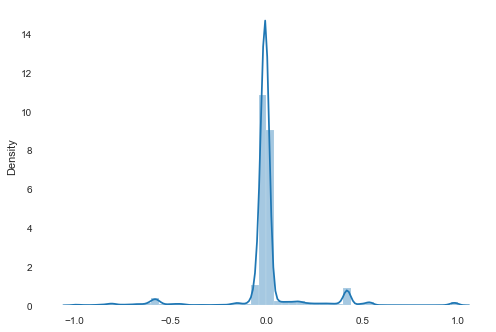

In [407]:
sns.distplot(model.resid_generalized)
plt.show()

`Y = -2.6131 +0.0111*Count-2.7926*Diff_srv_rate-0.0002*Dst_bytes+1.7886*Dst_host_diff_srv_rate--4.4581*Protocol_type_udp-1.3267*Same_srv_rate+4.6363*Serror_rate+4.2455*Service_other_type+8.6405*Service_private+9.672e-05*Src_bytes+0.9311*Flag_REJ`

In [68]:
train['prob'] = model.predict(train)
test['prob'] = model.predict(test)

In [203]:
train_auc = metrics.roc_auc_score(train.Activity,train.prob)
train_auc = pd.Series(train_auc)
train_auc

0    0.986573
dtype: float64

In [204]:
test_auc = metrics.roc_auc_score(test.Activity,test.prob)
test_auc=pd.Series(test_auc)
test_auc

0    0.986711
dtype: float64

In [202]:
Gini_train = 2*train_auc-1
Gini_train=pd.Series(Gini_train)
print(Gini_train)
Gini_test = 2*test_auc-1
Gini_test=pd.Series(Gini_test)
print(Gini_test)

0    0.973147
dtype: float64
0    0.973421
dtype: float64


In [72]:
temp = train
roc_df = pd.DataFrame()
for cutoff in np.linspace(0,1):
    temp['Activity_predicted'] = np.where(train.prob>cutoff,1,0)
    temp['TN'] = np.where(((train.Activity==0)&(train.Activity_predicted==0)),1,0)
    temp['TP'] = np.where(((train.Activity==1)&(train.Activity_predicted==1)),1,0)
    temp['FP'] = np.where(((train.Activity==0)&(train.Activity_predicted==1)),1,0)
    temp['FN'] = np.where(((train.Activity==1)&(train.Activity_predicted==0)),1,0)
    senstivity = temp.TP.sum()/(temp.TP.sum()+temp.FN.sum())
    specitivity = temp.TN.sum()/(temp.TN.sum()+temp.FP.sum())
    accuracy = (temp.TP.sum()+temp.TN.sum())/(temp.Activity_predicted.count())
    temp_df = pd.DataFrame([cutoff,senstivity,specitivity,accuracy]).T
    temp_df.columns = ["cutoff","senstivity","specitivity","accuracy"]
    roc_df = pd.concat([roc_df,temp_df])

In [73]:
roc_df['Total'] = roc_df['senstivity'] + roc_df['specitivity']

In [74]:
roc_df.sort_values(by =['Total'],ascending=False).head(1)

,cutoff,senstivity,specitivity,accuracy,Total
0,0.44898,0.980415,0.922977,0.949683,1.903392


In [75]:
roc_df[roc_df.Total==roc_df.Total.max()]

,cutoff,senstivity,specitivity,accuracy,Total
0,0.44898,0.980415,0.922977,0.949683,1.903392


In [76]:
train['Activity_Predicted'] = np.where(train.prob > 0.44898,1,0)
test['Activity_Predicted']=np.where(test.prob > 0.44898,1,0)

In [311]:
Logit_Confusion_train = metrics.confusion_matrix(train.Activity,train.Activity_Predicted)
Logit_Confusion_train

array([[43547,  3634],
       [  803, 40197]])

In [312]:
Logit_Confusion_test = metrics.confusion_matrix(test.Activity,test.Activity_Predicted)
Logit_Confusion_test

array([[18592,  1570],
       [  340, 17290]])

In [79]:
train_classificaton = metrics.classification_report(train.Activity,train.Activity_Predicted)
print(train_classificaton)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     47181
           1       0.92      0.98      0.95     41000

    accuracy                           0.95     88181
   macro avg       0.95      0.95      0.95     88181
weighted avg       0.95      0.95      0.95     88181



In [80]:
test_classificaton = metrics.classification_report(test.Activity,test.Activity_Predicted)
print(test_classificaton)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     20162
           1       0.92      0.98      0.95     17630

    accuracy                           0.95     37792
   macro avg       0.95      0.95      0.95     37792
weighted avg       0.95      0.95      0.95     37792



In [209]:
Logit = pd.concat([train_auc,test_auc,Gini_train,Gini_test],axis =1)
Logit.columns = ["Auroc_Train","Auroc_Test","Gini_Train","Gini_Test"]
Logit

,Auroc_Train,Auroc_Test,Gini_Train,Gini_Test
0,0.986573,0.986711,0.973147,0.973421


In [81]:
train['decile'] = pd.qcut(train['prob'],10,labels =False)
test['decile'] = pd.qcut(test['prob'],10,labels = False)

In [82]:
train['normal'] = 1-train.Activity
test['normal'] = 1-test.Activity

In [83]:
decile_train = train.groupby(by=['decile']).agg(min_prob = ('prob','min'),
                                                max_prob = ('prob','max'),
                                                no_of_attack=('Activity','sum'),
                                               no_of_normal = ('normal','sum'),
                                               total = ('Activity','count'))

In [84]:
decile_test = test.groupby(by=['decile']).agg(min_prob = ('prob','min'),
                                             max_prob = ('prob','max'),
                                             no_of_attack = ('Activity','sum'),
                                             no_of_normal = ('normal','sum'),
                                             total = ('Activity','count'))

In [85]:
#decile_train.to_csv('Decile_Train.csv')
#decile_test.to_csv('Decile_Test.csv')

In [86]:
compare_train = train.loc[:,["Activity",'Activity_Predicted',"decile",'prob']]
compare_test = test.loc[:,["Activity",'Activity_Predicted',"decile",'prob']]

In [87]:
compare_train.head(10)

,Activity,Activity_Predicted,decile,prob
110849,1,1,9,0.999999
4591,0,1,5,0.565060
96407,1,1,8,0.999828
55086,1,1,5,0.578720
52860,1,1,8,0.999907
108463,1,1,6,0.947528
13561,0,0,1,0.012114
17203,1,1,9,0.999999
116499,0,0,4,0.047536
46382,0,0,3,0.021134


## Machine Learning

In [228]:
Variable_for_vif = Variable_for_vif.drop(columns="Service_http",axis =1)

In [229]:
target = Variable_for_vif.Activity
features = Variable_for_vif.loc[:,Variable_for_vif.columns.difference(['Activity'])]

In [230]:
train_X,test_x,train_Y,test_y = train_test_split(features,target, test_size=0.3, random_state=123)

In [231]:
train_X.columns

Index(['Count', 'Diff_srv_rate', 'Dst_bytes', 'Dst_host_diff_srv_rate', 'Flag_REJ', 'Protocol_type_udp', 'Same_srv_rate', 'Serror_rate', 'Service_other_type', 'Service_private', 'Src_bytes'], dtype='object')

In [232]:
print(train_X.shape)
print(train_Y.shape)
print(test_x.shape)
print(test_y.shape)

(88181, 11)
(88181,)
(37792, 11)
(37792,)


## KNN Classifier

In [94]:
sc = StandardScaler()

In [95]:
Knn_data = sc.fit_transform(features)
Knn_data = pd.DataFrame(Knn_data)
Knn_data.columns = features.columns

In [96]:
train_X1, test_X1 , train_Y1, test_Y1 = train_test_split(Knn_data,target,test_size = 0.3,random_state = 344) 

In [138]:
param_grid_knn = {'n_neighbors':[300,400,500,600,700,800,900,1000],
              'weights': ['distance']}
knn_model = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid_knn, cv=2, scoring = 'f1_weighted',verbose = True)
knn_model = knn_model.fit(train_X1,train_Y1)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  6.9min finished


In [139]:
knn_model.best_params_

{'n_neighbors': 300, 'weights': 'distance'}

In [97]:
knn_model = KNeighborsClassifier(n_neighbors=300,weights = "distance", n_jobs=-1).fit(train_X1,train_Y1)

In [98]:
pred_y = knn_model.predict(train_X1)

In [99]:
print(metrics.classification_report(train_Y1, pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47037
           1       1.00      1.00      1.00     41144

    accuracy                           1.00     88181
   macro avg       1.00      1.00      1.00     88181
weighted avg       1.00      1.00      1.00     88181



In [314]:
Knn_Confusion_train = metrics.confusion_matrix(train_Y1,pred_y)
Knn_Confusion_train

array([[47018,    19],
       [   30, 41114]])

In [217]:
Knn_Auroc_Score_train = metrics.roc_auc_score(train_Y1,pred_y)
Knn_Auroc_Score_train = pd.Series(Knn_Auroc_Score)
print(Knn_Auroc_Score_train)
Knn_Gini_train = 2*Knn_Auroc_Score_train -1
Knn_Gini_train = pd.Series(Knn_Gini_train)
print(Knn_Gini_train)

0    0.999433
dtype: float64
0    0.998867
dtype: float64


In [213]:
Knn_Accuracy_train = metrics.accuracy_score(train_Y1,pred_y)
Knn_Accuracy_train = pd.Series(Knn_Accuracy_train)
Knn_Accuracy_train

0    0.999444
dtype: float64

In [103]:
knn_model_test = KNeighborsClassifier(n_neighbors=300,weights = "distance",n_jobs=-1).fit(test_X1,test_Y1)

In [104]:
pred_y1 = knn_model_test.predict(test_X1)

In [105]:
print(metrics.classification_report(test_Y1,pred_y1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20306
           1       1.00      1.00      1.00     17486

    accuracy                           1.00     37792
   macro avg       1.00      1.00      1.00     37792
weighted avg       1.00      1.00      1.00     37792



In [315]:
Knn_Confusion_test = metrics.confusion_matrix(test_Y1,pred_y1)
Knn_Confusion_test

array([[20302,     4],
       [   16, 17470]])

In [218]:
Knn_Auroc_Score_test = metrics.roc_auc_score(test_Y1,pred_y1)
Knn_Auroc_Score_test = pd.Series(Knn_Auroc_Score_test)
print(Knn_Auroc_Score_test)
Knn_Gini_test = 2*Knn_Auroc_Score_test -1
Knn_Gini_test = pd.Series(Knn_Gini_test)
print(Knn_Gini_test)

0    0.999444
dtype: float64
0    0.998888
dtype: float64


In [215]:
Knn_Accuracy_test = metrics.accuracy_score(test_Y1,pred_y1)
Knn_Accuracy_test = pd.Series(Knn_Accuracy_test)
Knn_Accuracy_test

0    0.999471
dtype: float64

In [220]:
Knn = pd.concat([Knn_Auroc_Score_train,Knn_Auroc_Score_test,Knn_Gini_train,Knn_Gini_test],axis=1)
Knn.columns = ["Auroc_Train","Auroc_Test","Gini_Train","Gini_Test"]
Knn

,Auroc_Train,Auroc_Test,Gini_Train,Gini_Test
0,0.999433,0.999444,0.998867,0.998888


## Decision Tress Classifier

In [153]:
param_grid_dt = {'max_depth': np.arange(3, 5),
             'max_features': np.arange(3,5)}
dt_model = GridSearchCV(DecisionTreeClassifier(),param_grid = param_grid_dt,cv =2 , scoring = 'f1_weighted')
dt_model = dt_model.fit(train_X,train_y)

In [154]:
dt_model.best_params_

{'max_depth': 3, 'max_features': 4}

In [234]:
dt_model_train = DecisionTreeClassifier(max_depth = 3,max_features = 4).fit(train_X,train_Y)

In [235]:
print(metrics.classification_report(train_Y,dt_model_train.predict(train_X)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     47181
           1       0.98      0.91      0.94     41000

    accuracy                           0.95     88181
   macro avg       0.95      0.95      0.95     88181
weighted avg       0.95      0.95      0.95     88181



In [236]:
Dt_Auroc_Score_train = metrics.roc_auc_score(train_Y,dt_model_train.predict(train_X))
Dt_Auroc_Score_train = pd.Series(Dt_Auroc_Score_train)
print(Dt_Auroc_Score_train)
Dt_Gini_train = 2*Dt_Auroc_Score_train - 1
Dt_Gini_train = pd.Series(Dt_Gini_train)
print(Dt_Gini_train)

0    0.946944
dtype: float64
0    0.893889
dtype: float64


In [316]:
DT_Confusion_train=metrics.confusion_matrix(train_Y,dt_model_train.predict(train_X))
DT_Confusion_train

array([[46277,   904],
       [ 3565, 37435]])

In [114]:
print("Accuracy",metrics.accuracy_score(train_Y,dt_model_train.predict(train_X)))

Accuracy 0.9504088182261485


In [237]:
dt_model_test = DecisionTreeClassifier(max_depth = 4, max_features = 4).fit(test_x,test_y)

In [238]:
print(metrics.classification_report(test_y,dt_model_test.predict(test_x)))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     20162
           1       0.96      0.93      0.94     17630

    accuracy                           0.95     37792
   macro avg       0.95      0.95      0.95     37792
weighted avg       0.95      0.95      0.95     37792



In [318]:
DT_Confusion_test = metrics.confusion_matrix(test_y,dt_model_test.predict(test_x))
DT_Confusion_test

array([[19421,   741],
       [ 1255, 16375]])

In [241]:
Dt_Auroc_Score_test = metrics.roc_auc_score(test_y,dt_model_test.predict(test_x))
Dt_Auroc_Score_test = pd.Series(Dt_Auroc_Score_test)
print(Dt_Auroc_Score_test)
Dt_Gini_test = 2*Dt_Auroc_Score_test -1 
Dt_Gini_test = pd.Series(Dt_Gini_test)
print(Dt_Gini_test)

0    0.946031
dtype: float64
0    0.892062
dtype: float64


In [242]:
print("Accuracy",metrics.accuracy_score(test_y,dt_model_test.predict(test_x)))

Accuracy 0.9471845893310754


In [243]:
DT = pd.concat([Dt_Auroc_Score_train,Dt_Auroc_Score_test,Dt_Gini_train,Dt_Gini_test],axis = 1)
DT.columns = ["Auroc_Train","Auroc_Test","Gini_Train","Gini_Test"]
DT

,Auroc_Train,Auroc_Test,Gini_Train,Gini_Test
0,0.946944,0.946031,0.893889,0.892062


## Bagging Classisfier

In [133]:
param_bagging = {"n_estimators":[700,800,900,1000,1100,1200]}
model_bagging = GridSearchCV(BaggingClassifier(),param_grid = param_bagging,cv = 2,verbose = True, n_jobs =-1)
model_bagging = model_bagging.fit(train_X,train_Y)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  6.9min finished


In [134]:
model_bagging.best_params_

{'n_estimators': 1200}

In [244]:
bagging_model_train = BaggingClassifier(n_estimators = 1200).fit(train_X,train_Y)

In [245]:
predict_bagging = bagging_model_train.predict(train_X)

In [246]:
print(metrics.classification_report(train_Y,predict_bagging))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47181
           1       1.00      1.00      1.00     41000

    accuracy                           1.00     88181
   macro avg       1.00      1.00      1.00     88181
weighted avg       1.00      1.00      1.00     88181



In [319]:
Bagging_Confusion_train = metrics.confusion_matrix(train_Y,predict_bagging)
Bagging_Confusion_train

array([[47152,    29],
       [   23, 40977]])

In [253]:
Bagging_Auroc_train =  metrics.roc_auc_score(train_Y,predict_bagging)
Bagging_Auroc_train = pd.Series(Bagging_Auroc_train)
print(Bagging_Auroc_train)
Bagging_Gini_train = 2*Bagging_Auroc_train-1
Bagging_Gini_train = pd.Series(Bagging_Gini_train)
print(Bagging_Gini_train)

0    0.999412
dtype: float64
0    0.998824
dtype: float64


In [254]:
print("Accuracy",metrics.accuracy_score(train_Y,predict_bagging))

Accuracy 0.9994103038069425


In [248]:
bagging_model_test = BaggingClassifier(n_estimators = 1200).fit(test_x,test_y)

In [249]:
bagging_predict_test = bagging_model_test.predict(test_x)

In [250]:
print(metrics.classification_report(test_y,bagging_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20162
           1       1.00      1.00      1.00     17630

    accuracy                           1.00     37792
   macro avg       1.00      1.00      1.00     37792
weighted avg       1.00      1.00      1.00     37792



In [320]:
Bagging_Confusion_test = metrics.confusion_matrix(test_y,bagging_predict_test)
Bagging_Confusion_test

array([[20152,    10],
       [    8, 17622]])

In [257]:
Bagging_Auroc_test = metrics.roc_auc_score(test_y,bagging_predict_test)
Bagging_Auroc_test = pd.Series(Bagging_Auroc_test)
print(Bagging_Auroc_test)
Bagging_Gini_test = 2*Bagging_Auroc_test -1 
Bagging_Gini_test = pd.Series(Bagging_Gini_test)
print(Bagging_Gini_test)

0    0.999525
dtype: float64
0    0.99905
dtype: float64


In [260]:
Bagging = pd.concat([Bagging_Auroc_train,Bagging_Auroc_test,Bagging_Gini_train,Bagging_Gini_test],axis =1)
Bagging.columns = ["Auroc_Train","Auroc_Test","Gini_Train","Gini_Test"]
Bagging

,Auroc_Train,Auroc_Test,Gini_Train,Gini_Test
0,0.999412,0.999525,0.998824,0.99905


## Random Forest Classifier

In [145]:
param_rf = {'n_estimators':[100,200,300,400,500,600],"max_depth":[3,4,5,6],"max_features" :[6,7,8,9]}
model_rf = GridSearchCV(RandomForestClassifier(),param_grid = param_rf, verbose = True,n_jobs = -1)
modelrf = model_rf.fit(train_X,train_Y)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 67.7min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 76.9min finished


In [146]:
modelrf.best_params_

{'max_depth': 6, 'max_features': 7, 'n_estimators': 300}

In [261]:
model_rf_train = RandomForestClassifier(n_estimators=300, max_depth = 6, max_features = 7).fit(train_X,train_Y)
rf_predict_train = model_rf_train.predict(train_X)

In [262]:
print(metrics.classification_report(train_Y,rf_predict_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     47181
           1       1.00      0.99      0.99     41000

    accuracy                           0.99     88181
   macro avg       0.99      0.99      0.99     88181
weighted avg       0.99      0.99      0.99     88181



In [321]:
RF_Confusion_train = metrics.confusion_matrix(train_Y,rf_predict_train)
RF_Confusion_train

array([[47020,   161],
       [  420, 40580]])

In [265]:
RF_Auroc_train = metrics.roc_auc_score(train_Y,rf_predict_train)
RF_Auroc_train = pd.Series(RF_Auroc_train)
print(RF_Auroc_train)
RF_Gini_train = 2*RF_Auroc_train - 1
RF_Gini_train = pd.Series(RF_Gini_train)
print(RF_Gini_train)

0    0.993172
dtype: float64
0    0.986344
dtype: float64


In [264]:
print("Accuracy",metrics.accuracy_score(train_Y,rf_predict_train))

Accuracy 0.9934112790737234


In [266]:
model_rf_test = RandomForestClassifier(n_estimators=300, max_depth = 6, max_features = 7).fit(test_x,test_y)

In [267]:
rf_predict_test = model_rf_test.predict(test_x)

In [268]:
print(metrics.classification_report(test_y,rf_predict_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     20162
           1       1.00      0.99      0.99     17630

    accuracy                           0.99     37792
   macro avg       0.99      0.99      0.99     37792
weighted avg       0.99      0.99      0.99     37792



In [322]:
RF_Confusion_test = metrics.confusion_matrix(test_y,rf_predict_test)
RF_Confusion_test

array([[20102,    60],
       [  196, 17434]])

In [271]:
RF_Auroc_test = metrics.roc_auc_score(test_y,rf_predict_test)
RF_Auroc_test = pd.Series(RF_Auroc_test)
print(RF_Auroc_test)
RF_Gini_test = 2*RF_Auroc_test -1 
RF_Gini_test = pd.Series(RF_Gini_test)
print(RF_Gini_test)

0    0.992953
dtype: float64
0    0.985907
dtype: float64


In [270]:
print("Accuracy",metrics.accuracy_score(test_y,rf_predict_test))

Accuracy 0.9932260795935648


In [272]:
RF = pd.concat([RF_Auroc_train,RF_Auroc_test,RF_Gini_train,RF_Gini_test],axis =1)
RF.columns = ["Auroc_Train","Auroc_Test","Gini_Train","Gini_Test"]
RF

,Auroc_Train,Auroc_Test,Gini_Train,Gini_Test
0,0.993172,0.992953,0.986344,0.985907


## Boosting

## ADA Boost

In [138]:
param_ada = {"n_estimators":[100,200,400,600,800],
            "learning_rate":[10 ** x for x in range(-3,3)]}

In [158]:
gridsearch_ada = GridSearchCV(GradientBoostingClassifier(),param_grid = param_ada,n_jobs = -1,cv = 2, verbose = True)
model_ada = gridsearch_ada.fit(train_X,train_Y)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  8.2min finished


In [159]:
model_ada.best_params_

{'learning_rate': 0.1, 'n_estimators': 800}

In [273]:
ada_train = AdaBoostClassifier(n_estimators = 800 , learning_rate = 0.1).fit(train_X,train_Y)

In [274]:
ada_train_predict = ada_train.predict(train_X)

In [275]:
print(metrics.classification_report(train_Y,ada_train_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     47181
           1       0.99      0.98      0.98     41000

    accuracy                           0.98     88181
   macro avg       0.98      0.98      0.98     88181
weighted avg       0.98      0.98      0.98     88181



In [323]:
Ada_confusion_train = metrics.confusion_matrix(train_Y,ada_train_predict)
Ada_confusion_train

array([[46661,   520],
       [ 1023, 39977]])

In [276]:
Ada_Auroc_train = metrics.roc_auc_score(train_Y,ada_train_predict)
Ada_Auroc_train = pd.Series(Ada_Auroc_train)
print(Ada_Auroc_train)
Ada_Gini_train = 2*Ada_Auroc_train -1 
Ada_Gini_train = pd.Series(Ada_Gini_train)
print(Ada_Gini_train)

0    0.982014
dtype: float64
0    0.964027
dtype: float64


In [277]:
print("Accuracy",metrics.accuracy_score(train_Y,ada_train_predict))

Accuracy 0.9825018995021604


In [278]:
ada_test = AdaBoostClassifier(n_estimators = 800 , learning_rate = 0.1).fit(test_x,test_y)
ada_test_predict = ada_test.predict(test_x)
print(metrics.classification_report(test_y,ada_test_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     20162
           1       0.99      0.98      0.98     17630

    accuracy                           0.98     37792
   macro avg       0.98      0.98      0.98     37792
weighted avg       0.98      0.98      0.98     37792



In [324]:
Ada_confusion_test = metrics.confusion_matrix(test_y,ada_test_predict)
Ada_confusion_test

array([[19928,   234],
       [  431, 17199]])

In [282]:
Ada_Aurco_test = metrics.roc_auc_score(test_y,ada_test_predict)
Ada_Aurco_test = pd.Series(Ada_Aurco_test)
print(Ada_Aurco_test)
Ada_Gini_test = 2*Ada_Aurco_test -1 
Ada_Gini_test = pd.Series(Ada_Gini_test)
print(Ada_Gini_test)

0    0.981974
dtype: float64
0    0.963947
dtype: float64


In [281]:
print("Accuracy Score",metrics.accuracy_score(test_y,ada_test_predict))

Accuracy Score 0.982403683319221


In [293]:
ADA = pd.concat([Ada_Auroc_train,Ada_Aurco_test,Ada_Gini_train,Ada_Gini_test],axis=1)
ADA.columns = ["Auroc_Train","Auroc_Test","Gini_Train","Gini_Test"]
ADA

,Auroc_Train,Auroc_Test,Gini_Train,Gini_Test
0,0.982014,0.981974,0.964027,0.963947


## Gradient Boost

In [167]:
model_gbm = GridSearchCV(GradientBoostingClassifier(),param_grid = param_ada,cv = 2, verbose = True, n_jobs =-1)
model_train = model_gbm.fit(train_X,train_Y)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  7.6min finished


In [168]:
model_train.best_params_

{'learning_rate': 0.1, 'n_estimators': 800}

In [283]:
model_gbm = GradientBoostingClassifier(n_estimators = 800, learning_rate = 0.1).fit(train_X,train_Y)

In [284]:
gbms_predict = model_gbm.predict(train_X)

In [285]:
print(metrics.classification_report(train_Y,gbms_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47181
           1       1.00      1.00      1.00     41000

    accuracy                           1.00     88181
   macro avg       1.00      1.00      1.00     88181
weighted avg       1.00      1.00      1.00     88181



In [325]:
Gbm_confusion_train = metrics.confusion_matrix(train_Y,gbms_predict)
Gbm_confusion_train

array([[47127,    54],
       [   54, 40946]])

In [287]:
Gbm_Auroc_train = metrics.roc_auc_score(train_Y,gbms_predict)
Gbm_Auroc_train = pd.Series(Gbm_Auroc_train)
print(Gbm_Auroc_train)
Gbm_Gini_train = 2*Gbm_Auroc_train - 1
Gbm_Gini_train = pd.Series(Gbm_Gini_train)
print(Gbm_Gini_train)

0    0.998769
dtype: float64
0    0.997538
dtype: float64


In [288]:
print("Accuracy_Score",metrics.accuracy_score(train_Y,gbms_predict))

Accuracy_Score 0.9987752463682653


In [289]:
model_gbm_test = GradientBoostingClassifier(n_estimators = 800, learning_rate = 0.1).fit(test_x,test_y)
gbms_predict_test = model_gbm_test.predict(test_x)
print(metrics.classification_report(test_y,gbms_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20162
           1       1.00      1.00      1.00     17630

    accuracy                           1.00     37792
   macro avg       1.00      1.00      1.00     37792
weighted avg       1.00      1.00      1.00     37792



In [326]:
Gbm_confusion_test = metrics.confusion_matrix(test_y,gbms_predict_test)
Gbm_confusion_test

array([[20146,    16],
       [   18, 17612]])

In [290]:
Gbm_Auroc_test = metrics.roc_auc_score(test_y,gbms_predict_test)
Gbm_Auroc_test = pd.Series(Gbm_Auroc_test)
print(Gbm_Auroc_test)
Gbm_Gini_test = 2*Gbm_Auroc_test -1
Gbm_Gini_test = pd.Series(Gbm_Gini_test)
print(Gbm_Gini_test)

0    0.999093
dtype: float64
0    0.998185
dtype: float64


In [291]:
print("Accuracy_Score",metrics.accuracy_score(test_y,gbms_predict_test))

Accuracy_Score 0.9991003386960203


In [292]:
GBM = pd.concat([Gbm_Auroc_train,Gbm_Auroc_test,Gbm_Gini_train,Gbm_Gini_test],axis=1)
GBM.columns = ["Auroc_Train","Auroc_Test","Gini_Train","Gini_Test"]
GBM

,Auroc_Train,Auroc_Test,Gini_Train,Gini_Test
0,0.998769,0.999093,0.997538,0.998185


## XGBOOST

In [152]:
xgb_estimator = XGBClassifier( learning_rate=0.01,
                               n_estimators=1000,
                               max_depth=5,
                               min_child_weight=1,
                               gamma=1,
                               subsample=0.8,
                               colsample_bytree=0.8,
                               n_jobs=-1,
                               reg_alpa=1,
                               scale_pos_weight=1,
                               random_state=42,
                               verbose=1)

In [294]:
xgb_model = xgb_estimator.fit(train_X,train_Y)

[07:03:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { reg_alpa, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [295]:
xgb_predict = xgb_model.predict(train_X)

In [296]:
print(metrics.classification_report(train_Y,xgb_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47181
           1       1.00      1.00      1.00     41000

    accuracy                           1.00     88181
   macro avg       1.00      1.00      1.00     88181
weighted avg       1.00      1.00      1.00     88181



In [327]:
Xgb_confusion_train = metrics.confusion_matrix(train_Y,xgb_predict)
Xgb_confusion_train

array([[47109,    72],
       [  139, 40861]])

In [298]:
XGB_Auroc_train = metrics.roc_auc_score(train_Y,xgb_predict)
XGB_Auroc_train = pd.Series(XGB_Auroc_train)
print(XGB_Auroc_train)
XGB_Gini_train = 2*XGB_Auroc_train - 1
XGB_Gini_train = pd.Series(XGB_Gini_train)
print(XGB_Gini_train)

0    0.997542
dtype: float64
0    0.995084
dtype: float64


In [299]:
print("Accuracy",metrics.accuracy_score(train_Y,xgb_predict))

Accuracy 0.9976071942935553


In [301]:
xgb_model_test = xgb_estimator.fit(test_x,test_y)

[07:13:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { reg_alpa, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [302]:
xgb_test_predict = xgb_model_test.predict(test_x)

In [303]:
print(metrics.classification_report(test_y,xgb_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20162
           1       1.00      1.00      1.00     17630

    accuracy                           1.00     37792
   macro avg       1.00      1.00      1.00     37792
weighted avg       1.00      1.00      1.00     37792



In [328]:
Xgb_confusion_test = metrics.confusion_matrix(test_y,xgb_test_predict)
Xgb_confusion_test

array([[20126,    36],
       [   56, 17574]])

In [305]:
XGB_Auroc_test = metrics.roc_auc_score(test_y,xgb_test_predict)
XGB_Auroc_test = pd.Series(XGB_Auroc_test)
print(XGB_Auroc_test)
XGB_Gini_test = 2*XGB_Auroc_test - 1
XGB_Gini_test = pd.Series(XGB_Gini_test)
print(XGB_Gini_test)

0    0.997519
dtype: float64
0    0.995038
dtype: float64


In [306]:
XGB = pd.concat([XGB_Auroc_train,XGB_Auroc_test,XGB_Gini_train,XGB_Gini_test],axis = 1)
XGB.columns = ["Auroc_Train","Auroc_Test","Gini_Train","Gini_Test"]
XGB

,Auroc_Train,Auroc_Test,Gini_Train,Gini_Test
0,0.997542,0.997519,0.995084,0.995038


## Comparing Auroc, GINI and Confusion Matrices

In [402]:
print("Logistic Regression","\n",Logit)
print("KNN","\n",Knn)
print("DT","\n",DT)
print("Bagging","\n",Bagging)
print("RF","\n",RF)
print("ADA","\n",ADA)
print("GBM","\n",GBM)
print("XGB","\n",XGB)

Logistic Regression 
    Auroc_Train  Auroc_Test  Gini_Train  Gini_Test
0     0.986573    0.986711    0.973147   0.973421
KNN 
    Auroc_Train  Auroc_Test  Gini_Train  Gini_Test
0     0.999433    0.999444    0.998867   0.998888
DT 
    Auroc_Train  Auroc_Test  Gini_Train  Gini_Test
0     0.946944    0.946031    0.893889   0.892062
Bagging 
    Auroc_Train  Auroc_Test  Gini_Train  Gini_Test
0     0.999412    0.999525    0.998824    0.99905
RF 
    Auroc_Train  Auroc_Test  Gini_Train  Gini_Test
0     0.993172    0.992953    0.986344   0.985907
ADA 
    Auroc_Train  Auroc_Test  Gini_Train  Gini_Test
0     0.982014    0.981974    0.964027   0.963947
GBM 
    Auroc_Train  Auroc_Test  Gini_Train  Gini_Test
0     0.998769    0.999093    0.997538   0.998185
XGB 
    Auroc_Train  Auroc_Test  Gini_Train  Gini_Test
0     0.997542    0.997519    0.995084   0.995038


In [337]:
print("Logistic_Train","\n", Logit_Confusion_train)
print("KNN_Train","\n",Knn_Confusion_train)
print("DT)Train","\n",DT_Confusion_train)
print("Baggin_Train","\n",Bagging_Confusion_train)
print("RF_Train","\n",RF_Confusion_train)
print("ADA_Train","\n",Ada_confusion_train)
print("GBM_Train","\n",Gbm_confusion_train)
print("XGB_Train","\n",Xgb_confusion_train)

print("Logistic_Test","\n", Logit_Confusion_test)
print("KNN_Test","\n",Knn_Confusion_test)
print("DT_Test","\n",DT_Confusion_test)
print("Bagging_Test","\n",Bagging_Confusion_test)
print("RF_Test","\n",RF_Confusion_test)
print("ADA_Test","\n",Ada_confusion_test)
print("GBM_Test","\n",Gbm_confusion_test)
print("XGB_Test","\n",Xgb_confusion_test)

Logistic_Train 
 [[43547  3634]
 [  803 40197]]
KNN_Train 
 [[47018    19]
 [   30 41114]]
DT)Train 
 [[46277   904]
 [ 3565 37435]]
Baggin_Train 
 [[47152    29]
 [   23 40977]]
RF_Train 
 [[47020   161]
 [  420 40580]]
ADA_Train 
 [[46661   520]
 [ 1023 39977]]
GBM_Train 
 [[47127    54]
 [   54 40946]]
XGB_Train 
 [[47109    72]
 [  139 40861]]
Logistic_Test 
 [[18592  1570]
 [  340 17290]]
KNN_Test 
 [[20302     4]
 [   16 17470]]
DT_Test 
 [[19421   741]
 [ 1255 16375]]
Bagging_Test 
 [[20152    10]
 [    8 17622]]
RF_Test 
 [[20102    60]
 [  196 17434]]
ADA_Test 
 [[19928   234]
 [  431 17199]]
GBM_Test 
 [[20146    16]
 [   18 17612]]
XGB_Test 
 [[20126    36]
 [   56 17574]]


### From the above matrices, Bagging turns out to be giving the best results.

In [332]:
import os

In [ ]:
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR

In [ ]:
model_svm = SVC(kernel='rbf', class_weight='balanced')


In [ ]:
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model_svm, param_grid, verbose = True)

grid.fit(train_X, train_y)

# Multinominal Classification

In [338]:
Variable_for_vif

,Count,Diff_srv_rate,Dst_bytes,Dst_host_diff_srv_rate,Protocol_type_udp,Same_srv_rate,Serror_rate,Service_other_type,Service_private,Src_bytes,Flag_REJ,Activity
0,2,0.00,0,0.03,0,1.00,0.0,0,0,491,0,0
1,13,0.15,0,0.60,1,0.08,0.0,1,0,146,0,0
2,123,0.07,0,0.05,0,0.05,1.0,0,1,0,0,1
3,5,0.00,8153,0.00,0,1.00,0.2,0,0,232,0,0
4,30,0.00,420,0.00,0,1.00,0.0,0,0,199,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
125968,184,0.06,0,0.06,0,0.14,1.0,0,1,0,0,1
125969,2,0.00,145,0.01,1,1.00,0.0,0,1,105,0,0
125970,1,0.00,384,0.06,0,1.00,0.0,0,0,2231,0,0
125971,144,0.05,0,0.05,0,0.06,1.0,1,0,0,0,1


In [339]:
Variable_for_vif['Attack'] = y_multi

In [340]:
Variable_for_vif.Attack.value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: Attack, dtype: int64

In [341]:
Variable_for_vif=Variable_for_vif.drop('Activity',axis =1)

In [342]:
Variable_for_vif['Attack_class'] = np.where(Variable_for_vif.Attack == 'normal','Normal',
(np.where((Variable_for_vif.Attack=="back")|(Variable_for_vif.Attack=="land")|(Variable_for_vif.Attack=="neptune")|(Variable_for_vif.Attack=="pod")|(Variable_for_vif.Attack=="smurf")|(Variable_for_vif.Attack=="teardrop")|(Variable_for_vif.Attack=="apache2")|(Variable_for_vif.Attack=="udpstorm")|(Variable_for_vif.Attack=="processtable")|(Variable_for_vif.Attack=="worm"),"DoS",
(np.where((Variable_for_vif.Attack=="satan")|(Variable_for_vif.Attack=="ipsweep")|(Variable_for_vif.Attack=="portsweep")|(Variable_for_vif.Attack=="mscan")|(Variable_for_vif.Attack=="saint")|(Variable_for_vif.Attack=="nmap"),"Probe",
(np.where((Variable_for_vif.Attack=="guess_passwd")|(Variable_for_vif.Attack=="ftp_write")|(Variable_for_vif.Attack=="imap")|(Variable_for_vif.Attack=="phf")|(Variable_for_vif.Attack=="multihop")|(Variable_for_vif.Attack=="warezmaster")|(Variable_for_vif.Attack=="warezclient")|(Variable_for_vif.Attack=="spy")|(Variable_for_vif.Attack=="xlock")|(Variable_for_vif.Attack=="xsnoop")|(Variable_for_vif.Attack=="snmpguess")|(Variable_for_vif.Attack=="snmpgetattack")|(Variable_for_vif.Attack=="httptunnel")|(Variable_for_vif.Attack=="sendmail")|(Variable_for_vif.Attack=="named"),"R2L",
(np.where((Variable_for_vif.Attack=="buffer_overflow")|(Variable_for_vif.Attack=="loadmodule")|(Variable_for_vif.Attack=="rootkit")|(Variable_for_vif.Attack=="perl")|(Variable_for_vif.Attack=="sqlattack")|(Variable_for_vif.Attack=="xterm")|(Variable_for_vif.Attack=="ps"),"U2R","Missclassification")))))))))

In [343]:
Variable_for_vif.Attack_class.value_counts()

Normal    67343
DoS       45927
Probe     11656
R2L         995
U2R          52
Name: Attack_class, dtype: int64

In [344]:
Variable_for_vif=Variable_for_vif.drop('Attack',axis=1)

In [345]:
Variable_for_vif

,Count,Diff_srv_rate,Dst_bytes,Dst_host_diff_srv_rate,Protocol_type_udp,Same_srv_rate,Serror_rate,Service_other_type,Service_private,Src_bytes,Flag_REJ,Attack_class
0,2,0.00,0,0.03,0,1.00,0.0,0,0,491,0,Normal
1,13,0.15,0,0.60,1,0.08,0.0,1,0,146,0,Normal
2,123,0.07,0,0.05,0,0.05,1.0,0,1,0,0,DoS
3,5,0.00,8153,0.00,0,1.00,0.2,0,0,232,0,Normal
4,30,0.00,420,0.00,0,1.00,0.0,0,0,199,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
125968,184,0.06,0,0.06,0,0.14,1.0,0,1,0,0,DoS
125969,2,0.00,145,0.01,1,1.00,0.0,0,1,105,0,Normal
125970,1,0.00,384,0.06,0,1.00,0.0,0,0,2231,0,Normal
125971,144,0.05,0,0.05,0,0.06,1.0,1,0,0,0,DoS


In [346]:
X = Variable_for_vif.drop('Attack_class',axis = 1)
Y = Variable_for_vif.Attack_class

In [347]:
train_X, test_x, train_Y, test_y =  train_test_split(X,Y, test_size = 0.3,random_state = 252)

## KNN

In [348]:
sc1 = StandardScaler()
Knn_data = sc1.fit_transform(X)
Knn_data = pd.DataFrame(Knn_data)
Knn_data.columns = X.columns

In [349]:
train_knn_X, test_knn_X, train_knn_y, test_knn_y =  train_test_split(Knn_data,Y, test_size = 0.3,random_state = 252)

In [202]:
param_grid_knn = {"n_neighbors":[300,400,500,600,700,800,900,1000],
                 "weights":['distance']}
model_knn = GridSearchCV(KNeighborsClassifier(),param_grid = param_grid_knn, cv = 2, scoring = 'f1_weighted',verbose = True, n_jobs=-1)
model_knn = model_knn.fit(train_knn_X,train_knn_y)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  4.7min finished


In [204]:
model_knn.best_params_

{'n_neighbors': 300, 'weights': 'distance'}

In [350]:
model_knn = KNeighborsClassifier(n_neighbors = 300,weights="distance").fit(train_knn_X,train_knn_y)

In [351]:
knn_predict_multi = model_knn.predict(train_knn_X)

In [352]:
accuracy_knn = metrics.accuracy_score(train_knn_y,knn_predict_multi)
print(accuracy_knn)

0.999319581315703


In [353]:
knn_cm = metrics.classification_report(train_knn_y,knn_predict_multi)
print(knn_cm)

              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00     32215
      Normal       1.00      1.00      1.00     47135
       Probe       1.00      1.00      1.00      8115
         R2L       1.00      0.99      0.99       685
         U2R       1.00      0.97      0.98        31

    accuracy                           1.00     88181
   macro avg       1.00      0.99      1.00     88181
weighted avg       1.00      1.00      1.00     88181



In [356]:
KNN_MULTI_CM_Train = metrics.confusion_matrix(train_knn_y,knn_predict_multi)
KNN_MULTI_CM_Train

array([[32212,     3,     0,     0,     0],
       [   16, 47106,    11,     2,     0],
       [    0,    22,  8093,     0,     0],
       [    1,     4,     0,   680,     0],
       [    0,     1,     0,     0,    30]])

In [357]:
model_knn_test = KNeighborsClassifier(n_neighbors = 300,weights="distance").fit(test_knn_X,test_knn_y)

In [358]:
knn_pred = model_knn_test.predict(test_knn_X)

In [359]:
print(metrics.classification_report(test_knn_y,knn_pred))

              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00     13712
      Normal       1.00      1.00      1.00     20208
       Probe       1.00      1.00      1.00      3541
         R2L       1.00      1.00      1.00       310
         U2R       1.00      1.00      1.00        21

    accuracy                           1.00     37792
   macro avg       1.00      1.00      1.00     37792
weighted avg       1.00      1.00      1.00     37792



In [360]:
KNN_MULTI_CM_Test = metrics.confusion_matrix(test_knn_y,knn_pred)
KNN_MULTI_CM_Test

array([[13710,     2,     0,     0,     0],
       [    5, 20200,     2,     1,     0],
       [    0,     6,  3535,     0,     0],
       [    1,     0,     0,   309,     0],
       [    0,     0,     0,     0,    21]])

## Decision Tree

In [181]:
param_grid_dt = {'max_depth': [3,4,5,6], 'max_leaf_nodes': [5,6,7,8,9,10]}
model_dt = GridSearchCV(DecisionTreeClassifier(),param_grid= param_grid_dt,cv = 2, scoring = 'f1_weighted',verbose = True, n_jobs=-1)
model_dt = model_dt.fit(train_X,train_Y)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   21.2s finished


In [182]:
model_dt.best_params_

{'max_depth': 4, 'max_leaf_nodes': 10}

In [361]:
model_dt = DecisionTreeClassifier(max_depth = 4, max_leaf_nodes = 10).fit(train_X,train_Y)

In [362]:
dt_prediction = model_dt.predict(train_X)

In [363]:
dt_cm = metrics.classification_report(train_Y,dt_prediction)
print(dt_cm)

              precision    recall  f1-score   support

         DoS       0.98      0.96      0.97     32215
      Normal       0.96      0.98      0.97     47135
       Probe       0.85      0.92      0.89      8115
         R2L       0.00      0.00      0.00       685
         U2R       0.00      0.00      0.00        31

    accuracy                           0.96     88181
   macro avg       0.56      0.57      0.57     88181
weighted avg       0.95      0.96      0.95     88181



In [365]:
DT_MULTI_CM_Train = metrics.confusion_matrix(train_Y,dt_prediction)
DT_MULTI_CM_Train

array([[30938,   785,   492,     0,     0],
       [  330, 46033,   772,     0,     0],
       [  361,   284,  7470,     0,     0],
       [   40,   641,     4,     0,     0],
       [    1,    30,     0,     0,     0]])

In [366]:
dt_test = DecisionTreeClassifier(max_depth = 4, max_leaf_nodes = 10).fit(test_x,test_y)

In [367]:
dt_test_prediction = dt_test.predict(test_x)

In [368]:
print(metrics.classification_report(test_y,dt_test_prediction))

              precision    recall  f1-score   support

         DoS       0.98      0.96      0.97     13712
      Normal       0.96      0.98      0.97     20208
       Probe       0.86      0.92      0.89      3541
         R2L       0.00      0.00      0.00       310
         U2R       0.00      0.00      0.00        21

    accuracy                           0.96     37792
   macro avg       0.56      0.57      0.57     37792
weighted avg       0.95      0.96      0.95     37792



In [369]:
DT_MULTI_CM_Test = metrics.confusion_matrix(test_y,dt_test_prediction)
DT_MULTI_CM_Test

array([[13187,   324,   201,     0,     0],
       [  133, 19747,   328,     0,     0],
       [  180,   107,  3254,     0,     0],
       [   13,   295,     2,     0,     0],
       [    0,    20,     1,     0,     0]])

## Bagging

In [223]:
param_bagging = {"n_estimators":[300,400,500,600,700,800,900,1000,1100,1200]}
model_bagging = GridSearchCV(BaggingClassifier(),param_grid = param_bagging,cv = 2,verbose = True, n_jobs =-1)
model_bagging = model_bagging.fit(train_X,train_Y)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  9.7min finished


In [224]:
model_bagging.best_params_

{'n_estimators': 1000}

In [372]:
bagging_model_train = BaggingClassifier(n_estimators = 1000).fit(train_X,train_Y)

predict_bagging = bagging_model_train.predict(train_X)

print(metrics.classification_report(train_Y,predict_bagging))

              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00     32215
      Normal       1.00      1.00      1.00     47135
       Probe       1.00      1.00      1.00      8115
         R2L       1.00      0.99      0.99       685
         U2R       0.97      1.00      0.98        31

    accuracy                           1.00     88181
   macro avg       0.99      1.00      1.00     88181
weighted avg       1.00      1.00      1.00     88181



In [373]:
Bagging_MULTI_CM_Train = metrics.confusion_matrix(train_Y,predict_bagging)
Bagging_MULTI_CM_Train

array([[32209,     6,     0,     0,     0],
       [   13, 47104,    15,     2,     1],
       [    0,    18,  8097,     0,     0],
       [    1,     4,     0,   680,     0],
       [    0,     0,     0,     0,    31]])

In [374]:
bagging_model_test = BaggingClassifier(n_estimators = 1000).fit(test_x,test_y)

bagging_predict_test = bagging_model_test.predict(test_x)

print(metrics.classification_report(test_y,bagging_predict_test))

              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00     13712
      Normal       1.00      1.00      1.00     20208
       Probe       1.00      1.00      1.00      3541
         R2L       1.00      1.00      1.00       310
         U2R       1.00      1.00      1.00        21

    accuracy                           1.00     37792
   macro avg       1.00      1.00      1.00     37792
weighted avg       1.00      1.00      1.00     37792



In [376]:
Bagging_MULTI_CM_Test = metrics.confusion_matrix(test_y,bagging_predict_test)
Bagging_MULTI_CM_Test

array([[13710,     2,     0,     0,     0],
       [    5, 20199,     3,     1,     0],
       [    0,     5,  3536,     0,     0],
       [    1,     0,     0,   309,     0],
       [    0,     0,     0,     0,    21]])

## Random Forest

In [227]:
param_rf = {'n_estimators':[100,200,300,400,500,600],"max_depth":[3,4,5,6],"max_features" :[6,7,8,9]}
model_rf = GridSearchCV(RandomForestClassifier(),param_grid = param_rf, verbose = True,n_jobs = -1)
modelrf = model_rf.fit(train_X,train_Y)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 67.1min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 76.0min finished


In [228]:
modelrf.best_params_

{'max_depth': 6, 'max_features': 6, 'n_estimators': 200}

In [377]:
model_rf_train = RandomForestClassifier(n_estimators=200, max_depth = 6, max_features = 6).fit(train_X,train_Y)
rf_predict_train = model_rf_train.predict(train_X)

print(metrics.classification_report(train_Y,rf_predict_train))

              precision    recall  f1-score   support

         DoS       1.00      0.99      1.00     32215
      Normal       0.98      1.00      0.99     47135
       Probe       0.98      0.99      0.98      8115
         R2L       0.00      0.00      0.00       685
         U2R       0.00      0.00      0.00        31

    accuracy                           0.99     88181
   macro avg       0.59      0.60      0.59     88181
weighted avg       0.98      0.99      0.98     88181



In [379]:
RF_MULTI_CM_Train = metrics.confusion_matrix(train_Y,rf_predict_train)
RF_MULTI_CM_Train

array([[31958,   210,    47,     0,     0],
       [    6, 47007,   122,     0,     0],
       [    4,    89,  8022,     0,     0],
       [    3,   681,     1,     0,     0],
       [    0,    31,     0,     0,     0]])

In [382]:
model_rf_test = RandomForestClassifier(n_estimators=500, max_depth = 6, max_features = 6).fit(test_x,test_y)

rf_predict_test = model_rf_test.predict(test_x)

print(metrics.classification_report(test_y,rf_predict_test))

              precision    recall  f1-score   support

         DoS       1.00      0.99      1.00     13712
      Normal       0.98      1.00      0.99     20208
       Probe       0.99      0.98      0.98      3541
         R2L       0.93      0.04      0.08       310
         U2R       0.00      0.00      0.00        21

    accuracy                           0.99     37792
   macro avg       0.78      0.60      0.61     37792
weighted avg       0.99      0.99      0.98     37792



In [383]:
RF_MULTI_CM_Test = metrics.confusion_matrix(test_y,rf_predict_test)
RF_MULTI_CM_Test

array([[13616,    89,     7,     0,     0],
       [    6, 20157,    44,     1,     0],
       [    0,    55,  3486,     0,     0],
       [    1,   296,     0,    13,     0],
       [    0,    20,     1,     0,     0]])

## Boosting

In [231]:
param_ada = {"n_estimators":[100,200,400,600,800],
            "learning_rate":[10 ** x for x in range(-3,3)]}

gridsearch_ada = GridSearchCV(GradientBoostingClassifier(),param_grid = param_ada,n_jobs = -1,cv = 2, verbose = True)
model_ada = gridsearch_ada.fit(train_X,train_Y)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 50.7min finished


In [232]:
model_ada.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [384]:
ada_train = AdaBoostClassifier(n_estimators = 100 , learning_rate = 0.1).fit(train_X,train_Y)

ada_train_predict = ada_train.predict(train_X)

print(metrics.classification_report(train_Y,ada_train_predict))

              precision    recall  f1-score   support

         DoS       0.00      0.00      0.00     32215
      Normal       0.82      0.98      0.89     47135
       Probe       0.15      0.59      0.24      8115
         R2L       0.00      0.00      0.00       685
         U2R       0.00      0.00      0.00        31

    accuracy                           0.58     88181
   macro avg       0.19      0.31      0.23     88181
weighted avg       0.45      0.58      0.50     88181



In [385]:
ADA_MULTI_CM_Train = metrics.confusion_matrix(train_Y,ada_train_predict)
ADA_MULTI_CM_Train

array([[    1,  6403, 25811,     0,     0],
       [  371, 46128,   636,     0,     0],
       [    6,  3300,  4809,     0,     0],
       [   41,   641,     3,     0,     0],
       [    0,    31,     0,     0,     0]])

In [386]:
ada_test = AdaBoostClassifier(n_estimators = 100 , learning_rate = 0.1).fit(test_x,test_y)

ada_test_predict = ada_test.predict(test_x)

print(metrics.classification_report(test_y,ada_test_predict))

              precision    recall  f1-score   support

         DoS       1.00      0.71      0.83     13712
      Normal       0.86      0.99      0.92     20208
       Probe       0.68      0.90      0.78      3541
         R2L       0.00      0.00      0.00       310
         U2R       0.00      0.00      0.00        21

    accuracy                           0.87     37792
   macro avg       0.51      0.52      0.51     37792
weighted avg       0.89      0.87      0.87     37792



In [387]:
ADA_MULTI_CM_Test = metrics.confusion_matrix(test_y,ada_test_predict)
ADA_MULTI_CM_Test

array([[ 9739,  2566,  1407,     0,     0],
       [    6, 20100,   102,     0,     0],
       [    2,   340,  3199,     0,     0],
       [    1,   307,     2,     0,     0],
       [    0,    20,     1,     0,     0]])

In [235]:
model_gbm = GridSearchCV(GradientBoostingClassifier(),param_grid = param_ada,cv = 2, verbose = True, n_jobs =-1)
model_train = model_gbm.fit(train_X,train_Y)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 51.3min finished


In [236]:
model_train.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [398]:
model_gbm = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1).fit(train_X,train_Y)

gbms_predict = model_gbm.predict(train_X)

print(metrics.classification_report(train_Y,gbms_predict))

              precision    recall  f1-score   support

         DoS       1.00      0.97      0.99     32215
      Normal       1.00      0.90      0.95     47135
       Probe       0.99      0.69      0.81      8115
         R2L       0.98      0.78      0.87       685
         U2R       0.00      0.48      0.00        31

    accuracy                           0.91     88181
   macro avg       0.79      0.76      0.72     88181
weighted avg       1.00      0.91      0.95     88181



In [389]:
GBM_Multi_CM_train = metrics.confusion_matrix(train_Y,gbms_predict)
GBM_Multi_CM_train

array([[32182,    29,     4,     0,     0],
       [   27, 46990,    67,     5,    46],
       [    2,    63,  8049,     0,     1],
       [    4,    32,     0,   636,    13],
       [    0,    22,     1,     0,     8]])

In [390]:
model_gbm_test = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1).fit(test_x,test_y)

gbms_predict_test = model_gbm_test.predict(test_x)

print(metrics.classification_report(test_y,gbms_predict_test))

              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00     13712
      Normal       1.00      1.00      1.00     20208
       Probe       0.99      0.99      0.99      3541
         R2L       0.98      0.98      0.98       310
         U2R       0.43      0.29      0.34        21

    accuracy                           1.00     37792
   macro avg       0.88      0.85      0.86     37792
weighted avg       1.00      1.00      1.00     37792



In [391]:
GBM_Multi_CM_test = metrics.confusion_matrix(test_y,gbms_predict_test)
GBM_Multi_CM_test

array([[13696,    13,     3,     0,     0],
       [   12, 20159,    23,     6,     8],
       [    0,    25,  3516,     0,     0],
       [    0,     5,     1,   304,     0],
       [    1,    13,     1,     0,     6]])

In [393]:
xgb_estimator = XGBClassifier( learning_rate=0.01,
                               n_estimators=1000,
                               max_depth=5,
                               min_child_weight=1,
                               gamma=1,
                               subsample=0.8,
                               colsample_bytree=0.8,
                               n_jobs=-1,
                               reg_alpa=1,
                               scale_pos_weight=1,
                               random_state=42,
                               verbose=1)

xgb_model = xgb_estimator.fit(train_X,train_Y)

xgb_predict = xgb_model.predict(train_X)

print(metrics.classification_report(train_Y,xgb_predict))


[01:11:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { reg_alpa, scale_pos_weight, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00     32215
      Normal       1.00      1.00      1.00     47135
       Probe       1.00      0.99      0.99      8115
         R2L       1.00      0.93      0.96       685
         U2R       1.00      0.42      0.59        31

    accuracy                           1.00     88181
   macro avg       1.00      0.87      0.91     88181
weighted avg       1.00      1.00      1.00     88181



In [394]:
Xgb_Multi_CM_train = metrics.confusion_matrix(train_Y,xgb_predict)
Xgb_Multi_CM_train

array([[32205,     9,     1,     0,     0],
       [   27, 47074,    32,     2,     0],
       [    0,    50,  8065,     0,     0],
       [    4,    47,     0,   634,     0],
       [    0,    18,     0,     0,    13]])

In [396]:
xgb_model_test = xgb_estimator.fit(test_x,test_y)
xgb_predict_test = xgb_model_test.predict(test_x)

[01:22:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { reg_alpa, scale_pos_weight, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [397]:
XGB_Multi_CM_Test = metrics.confusion_matrix(test_y,xgb_predict_test)
XGB_Multi_CM_Test

array([[13703,     6,     3,     0,     0],
       [    8, 20190,     8,     2,     0],
       [    0,    17,  3524,     0,     0],
       [    0,    16,     0,   294,     0],
       [    0,     7,     1,     0,    13]])

## Comparing the Confusion Metrics

In [401]:
print("KNN_Train","\n",KNN_MULTI_CM_Train)
print("DT_Train","\n",DT_MULTI_CM_Train)
print("Bagging_Train","\n",Bagging_MULTI_CM_Train)
print("RF_Train","\n",RF_MULTI_CM_Train)
print("ADA_Train","\n",ADA_MULTI_CM_Train)
print("GBM_Train","\n",GBM_Multi_CM_train)
print("Xgb_Train","\n",Xgb_Multi_CM_train)

print("KNN_Test","\n",KNN_MULTI_CM_Test)
print("DT_Test","\n",DT_MULTI_CM_Test)
print("Bagging_Test","\n",Bagging_MULTI_CM_Test)
print("RF_Test","\n",RF_MULTI_CM_Test)
print("ADA_Test","\n",ADA_MULTI_CM_Test)
print("GBM_Test","\n",GBM_Multi_CM_test)
print("Xgb_Test","\n",XGB_Multi_CM_Test)

KNN_Train 
 [[32212     3     0     0     0]
 [   16 47106    11     2     0]
 [    0    22  8093     0     0]
 [    1     4     0   680     0]
 [    0     1     0     0    30]]
DT_Train 
 [[30938   785   492     0     0]
 [  330 46033   772     0     0]
 [  361   284  7470     0     0]
 [   40   641     4     0     0]
 [    1    30     0     0     0]]
Bagging_Train 
 [[32209     6     0     0     0]
 [   13 47104    15     2     1]
 [    0    18  8097     0     0]
 [    1     4     0   680     0]
 [    0     0     0     0    31]]
RF_Train 
 [[31958   210    47     0     0]
 [    6 47007   122     0     0]
 [    4    89  8022     0     0]
 [    3   681     1     0     0]
 [    0    31     0     0     0]]
ADA_Train 
 [[    1  6403 25811     0     0]
 [  371 46128   636     0     0]
 [    6  3300  4809     0     0]
 [   41   641     3     0     0]
 [    0    31     0     0     0]]
GBM_Train 
 [[32182    29     4     0     0]
 [   27 46990    67     5    46]
 [    2    63  8049     0     

In [ ]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(train_X, train_Y) 
gnb_predictions = gnb.predict(train_X) 
  
print(metrics.classification_report(train_Y,gnb_predictions))


In [ ]:
cm = metrics.confusion_matrix(test_y, gnb_predictions)
print(cm)

In [ ]:
svm_model = SVC(kernel = "linear",C=1).fit(train_X,train_Y)
svm_prediction_test = svm_model.predict(train_X)

In [ ]:
accuracy_test = svm_model.score(test_X,test_y)
accuracy_test

In [ ]:
svm_cm = metrics.classification_report(test_y,svm_prediction)

In [ ]:
print(svm_cm)